## Создание модели персонализованных предлолжений для интернет-магазина "В один клик"

#### Описание исследования  
Данное исследование предназначено для выявления закономерностей среди различных факторов, 
влияющих на покупательную активность постоянных клиентов интернет-магазина "В один клик". Наблюдения позволят сформировать модель персонализованных предложений для удержания клиентов в ситуации снижения покупательной активности. 

В ходе исследования предстоит совершить следующие действия:  
1) Маркировка уровней финансовой активности постоянных покупателей одим из двух уровней: "снизилась"/"осталась неизменной"  
2) Сбор данных о клиентах по признакам, описывающим следующие аспекты:  
- коммуникация сотрудников с клиентами  
- продуктовое поведения покупателей  
- покупательное поведение клиентов  
- поведения покупателя на сайте  
3) Построение модели, позволяющей предсказать снижение покупательской активности в будущие 3 месяца   
4) Сегментировать покупателей и разработка персонализованных предложений для сегментов.  

Для проведения исследования были предоставлены таблицы сводных данных о покупателях:    
    - Данные о поведении покупателей на сайте, о коммуникациях с покупателем и его продуктовом поведении.     
    - Данные о выручке с покупателей на сайте.    
    - Данные о времени, проведённом покупателями на сайте  
    - Данные о среднемесячной прибыли от покупателей за последние 3 месяца  
В работе необходимо произвести следующие действия:    
1) Изучение общей информации:  
    - Изученеие файлов с данными, получение общей информации      
2) Предобработка данных:    
    - унификация написания названий столбцов и текстовой информации    
    - ликвидация пропусков и дублей    
    - изменение типов данных в соответствии с будущими вычислениями    
3) Исследовательский анализ:    
    - отбор покупателей, совершавших покупки последние 3 месяца
    - аналитика параметров, отображающих покупательскую способность клиентов
    - построение гистограмм и графиков "ящик с устами"    
    - выявление выбросов
4) Объединение таблиц:  
    - формирование единой таблицы из данных в файлах market_file.csv, market_money.csv, market_time.csv
5) Корреляционный анализ данных:    
    - рассчёт коэффициенты корреляции между признаками
    - определение качества связей между целевыми и входными признаками  
    - определение наличия мультиколлинеарности среди признаков.    
6) Приминение пайплайнов для поиска лучшей модели прогнозирования:    
    - раздельная обработка и подготовка количественных и категориальных данных    
    - Применение четырёх моделей прогнозирования: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC  
    - подбор гипермараметров и масштабирование данных  
    - подбор лучшей метрики для оценки адекватности модели  
    - выявление лучше модели для формирования прогноза  
7) Анализ важности признаков:  
    - оценка важности признаков для лучшей модели  
    - построение графика важности с помощью метода SHAP
8) Сегментация покупателей:  
    - формирования характерной группы покупателей для увеличения её покупательской способности  
    - географическое и аналитическое исследование выбранной группы покупателей
    - формирование предложения для работы с выбранным сегментом клиентов
8) Общий вывод  
    
    


In [1]:
#импорт библиотек
!pip install shap
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import shap
from scipy.stats import binom
import seaborn as sns
from math import sqrt
from scipy import stats as st
from phik import phik_matrix
from phik.report import plot_correlation_matrix
RANDOM_STATE = 42

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer


from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)
!pip install scikit-learn --upgrade


In [2]:
#импорт файлов
pd.set_option('display.max_columns', 50) 
pth1_1 = '/datasets/market_file.csv'
pth2_1 = 'market_file.csv'

pth1_2 = '/datasets/market_money.csv'
pth2_2 = 'market_money.csv'

pth1_3 = '/datasets/market_time.csv'
pth2_3 = 'market_time.csv'

pth1_4 = '/datasets/money.csv'
pth2_4 = 'money.csv'

if os.path.exists(pth1_1):
    market_file = pd.read_csv(pth1_1, sep=',', decimal=';')
elif os.path.exists(pth2_1):
    market_file = pd.read_csv(pth2_1, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_2):
    market_money = pd.read_csv(pth1_2, sep=',', decimal=';')
elif os.path.exists(pth2_2):
    market_money = pd.read_csv(pth2_2, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_3):
    market_time = pd.read_csv(pth1_3, sep=',', decimal=';')
elif os.path.exists(pth2_3):
    market_time = pd.read_csv(pth2_3, sep=',', decimal=';')
else:
    print('Something is wrong')    
if os.path.exists(pth1_4):
    money = pd.read_csv(pth1_4, sep=';', decimal=',')
elif os.path.exists(pth2_4):
    money = pd.read_csv(pth2_4, sep=';', decimal=',')
else:
    print('Something is wrong')    

#### Изучение общей информации

In [3]:
display(market_file.head(5))
market_file.info()

display(market_money.head(5))
market_money.info()

display(market_time.head(5))
market_time.info()

display(money.head(5))
money.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [4]:
#приведение к нижнему регистру
market_file.columns = market_file.columns.str.lower()
market_money.columns = market_money.columns.str.lower()
market_time.columns = market_time.columns.str.lower()
money.columns = money.columns.str.lower()
display(market_file.columns, market_money.columns, market_time.columns, money.columns)

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

Данные были загружены и представлены в четырёх таблицах: market_file, market_money, market_time и money.
В первой таблице 13 столбцов и 1300 строк, во второй 3 столбца и 3900 строк, в третей - 7 столбцов и 2600 строк, в четвёртой - 2 столбца и 1300 строк
Характеристики в столбцах совпадают с заявленными в техническом задании.
Названия столбцов были приведены к нижнему регистру.

#### Предобработка данных

In [5]:
#изменение типов данных
market_file['маркет_актив_6_мес'] = market_file['маркет_актив_6_мес'].astype(float)
market_file['акционные_покупки'] = market_file['акционные_покупки'].astype(float)

market_money['выручка'] = market_money['выручка'].astype(float)


In [6]:
market_file.info()
market_money.info()
market_time.info()
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [7]:
#пропуски
display(market_file.isna().sum(), market_money.isna().sum(), market_time.isna().sum(), money.isna().sum())

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

id         0
период     0
выручка    0
dtype: int64

id        0
период    0
минут     0
dtype: int64

id         0
прибыль    0
dtype: int64

In [8]:
#явные дубли
display(market_file.duplicated().sum(), market_money.duplicated().sum(), market_time.duplicated().sum(), money.duplicated().sum())

0

0

0

0

In [9]:
#неявные дубли
display(market_file['покупательская активность'].unique(),
        market_file['тип сервиса'].unique(),
        market_file['разрешить сообщать'].unique(),
        market_file['популярная_категория'].unique()
       )
display(market_money['период'].unique())
display(market_time['период'].unique())


array(['Снизилась', 'Прежний уровень'], dtype=object)

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [10]:
#замена опечаток
market_file['тип сервиса'] = market_file['тип сервиса'].str.replace('стандартт', 'стандарт')
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

#привидение к нижнему регистру
market_file['покупательская активность'] = market_file['покупательская активность'].str.lower()
market_file['тип сервиса'] = market_file['тип сервиса'].str.lower()
market_file['популярная_категория'] = market_file['популярная_категория'].str.lower()



display(market_file['покупательская активность'].unique(),
        market_file['тип сервиса'].unique(),
        market_file['разрешить сообщать'].unique(),
        market_file['популярная_категория'].unique()
       )
display(market_money['период'].unique())
display(market_time['период'].unique())

display(market_file.duplicated().sum(), market_money.duplicated().sum(), market_time.duplicated().sum(), money.duplicated().sum())

array(['снизилась', 'прежний уровень'], dtype=object)

array(['премиум', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

0

0

0

0

In [11]:
#удаление дублей
market_money = market_money.drop_duplicates().reset_index(drop=True)
display(market_money.duplicated().sum())

0

Данные были предобработаны.  
Дубликаты не были обнаружены.  
Вся текстовая информация приведена к нижнему регистру, испралвены опечатки.  
Пропуски не были обнаружены.  
Изменены типы данных в столбцах 'маркет_актив_6_мес', 'акционные_покупки', 'выручка'.

#### Исследовательский анализ

In [12]:
display(market_file.head(5), market_money.head(5), market_time.head(5), money.head(5))


,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [13]:
display(market_file.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),
market_money.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),
market_time.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),
money.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
5%,215412.950000,2.400000,3.000000,184.000000,0.130000,1.00000,0.000000,1.000000,2.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
95%,216582.050000,5.800000,5.000000,997.050000,0.950000,6.00000,7.000000,8.000000,15.000000
99%,216634.010000,6.300000,5.000000,1051.000000,0.990000,6.00000,9.000000,9.000000,18.000000


,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
5%,215412.950000,3930.990000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
95%,216582.050000,6226.525000
99%,216634.010000,6957.737000


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
5%,215412.950000,7.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
95%,216582.050000,20.000000
99%,216634.010000,22.000000


,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
5%,215412.950000,2.329500
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
95%,216582.050000,5.580500
99%,216634.010000,6.400400


Были замечены данные с выбросами в данных с выручкой:  
    минимальное значение 0, максимальное 106862. Стандартное отклоениение : 1777    
    
   
    

In [14]:
#выбор пользователей с активностью не менее 3-ех месяцев
df1 = market_money[market_money['выручка']>0].groupby('id', as_index=False)['период'].count()
ids = df1[df1['период']==3]['id']
market_file = market_file[market_file['id'].isin(ids)]
display(market_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская активность            1297 non-null   object 
 2   тип сервиса                          1297 non-null   object 
 3   разрешить сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

None

In [15]:
#распределение количественных данных

def show_hists(data, data_label, num_bins, log_scale=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.histplot(data, bins=num_bins, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=market_file, x=data_label, ax=axes[1])
    plt.figure(figsize=(16,4))
    ax = plt.subplot(121)
    st.probplot(data, dist="norm", plot=plt)
    ax.set_title("Q-Q Prob Plot. " + data_label )
    plt.show()
    
    


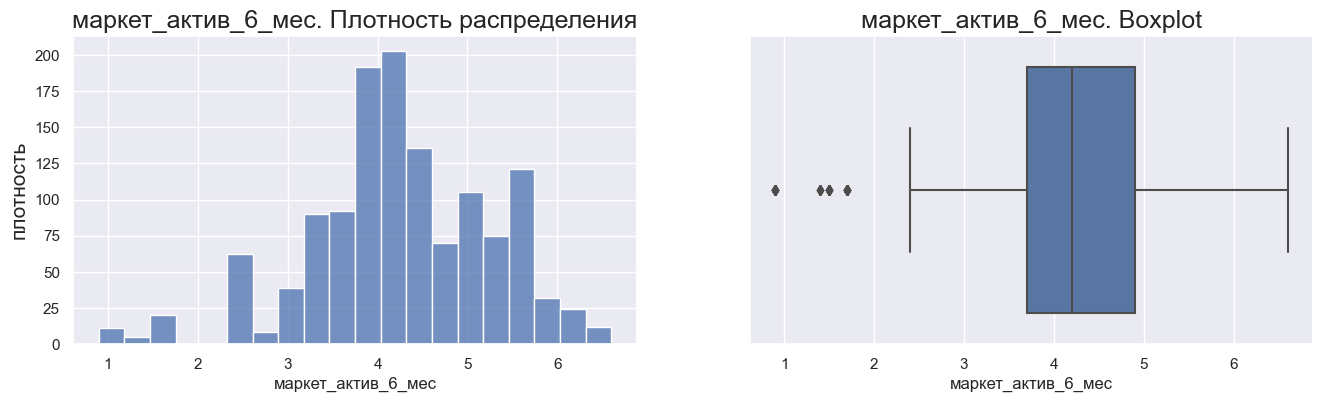

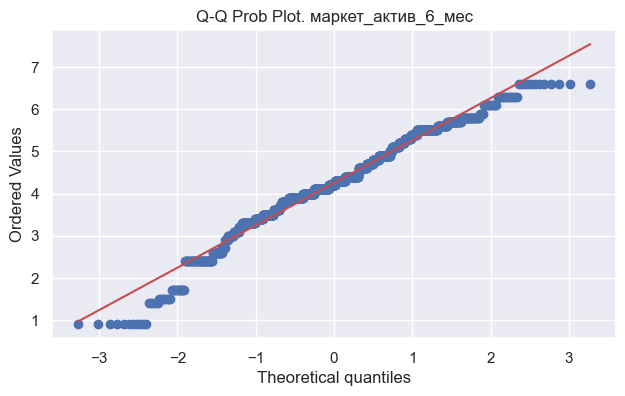

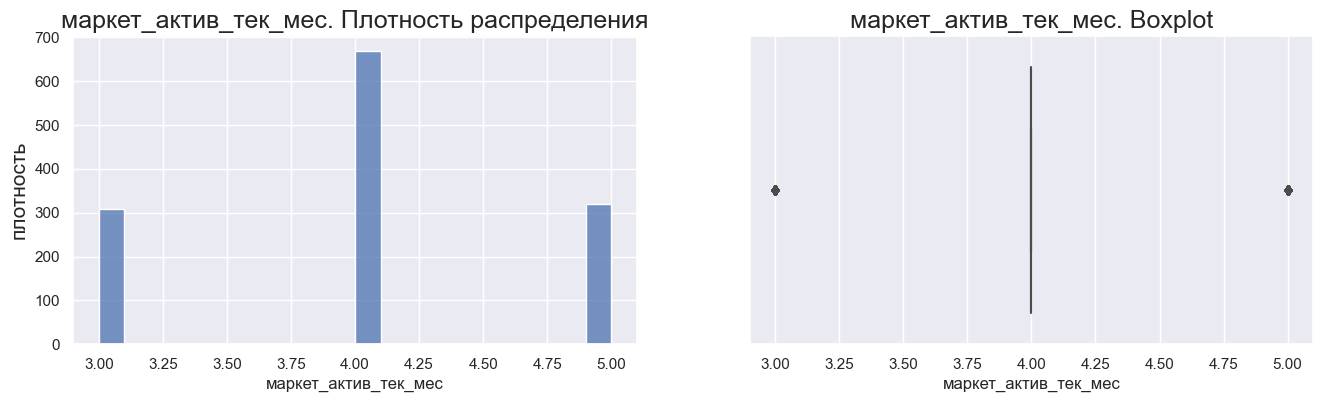

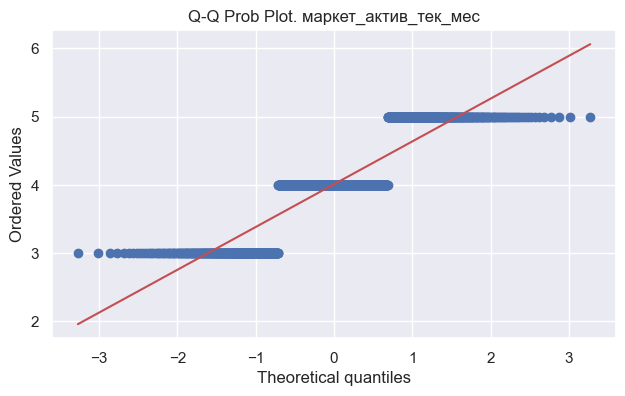

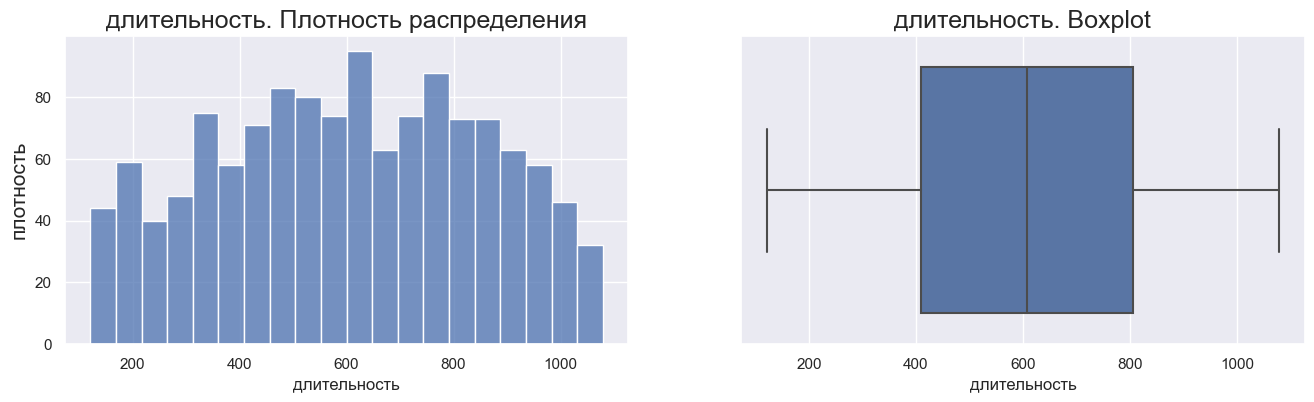

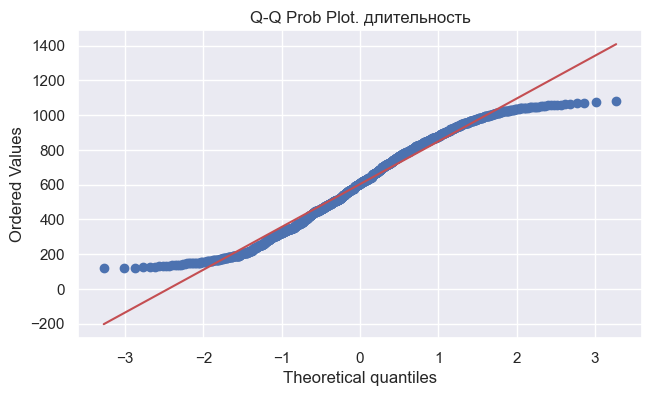

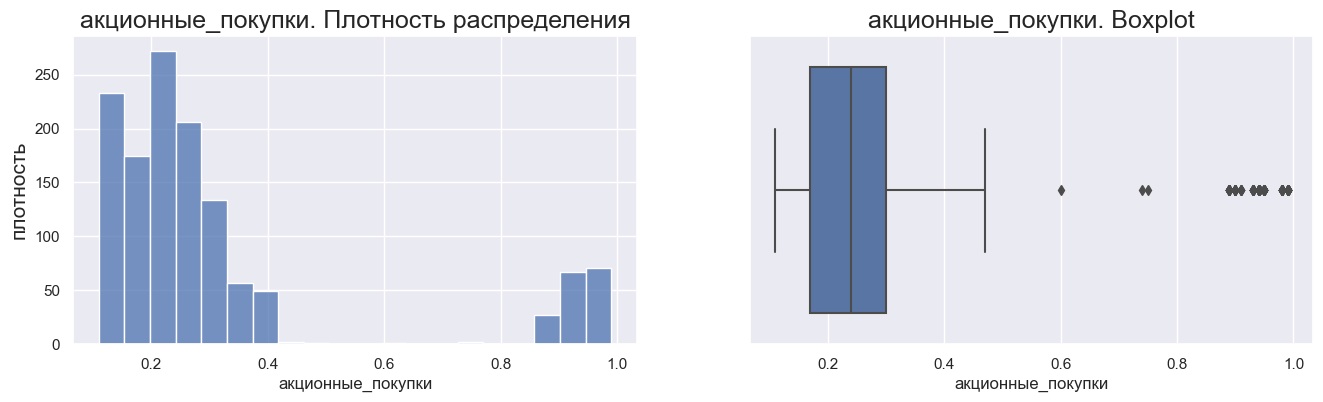

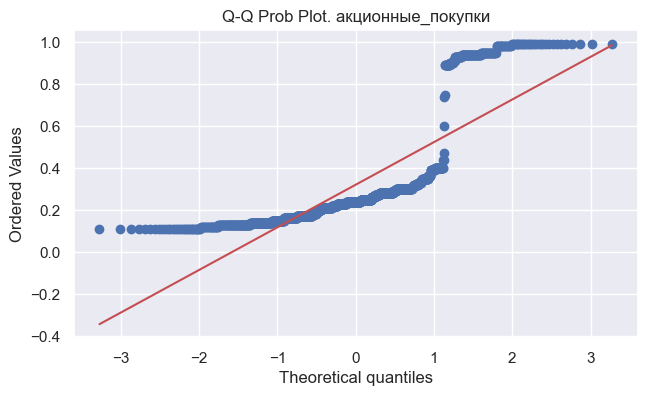

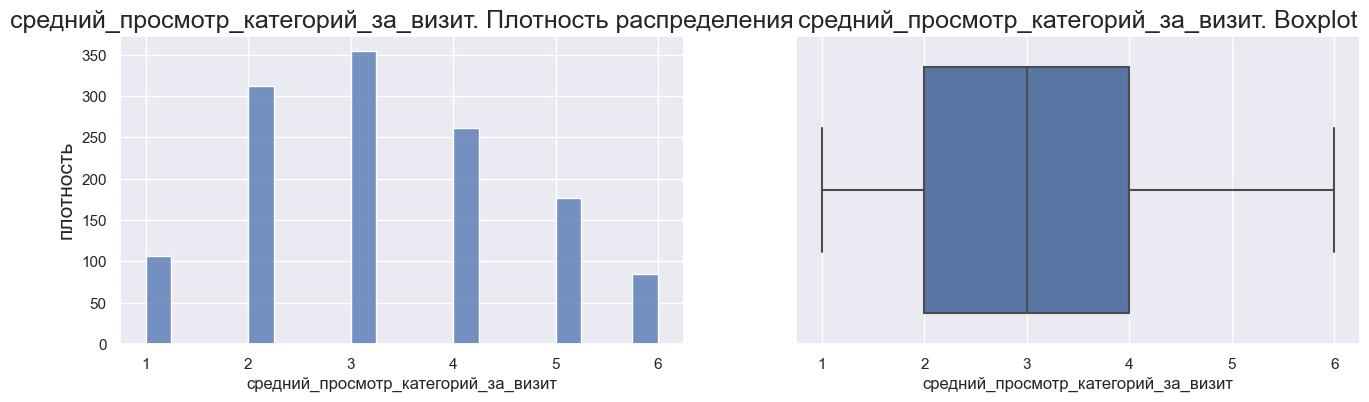

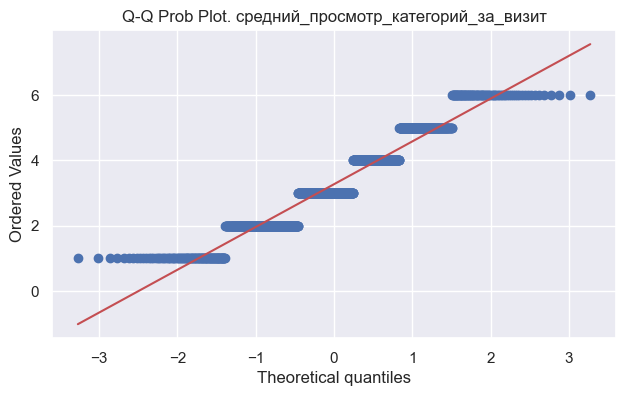

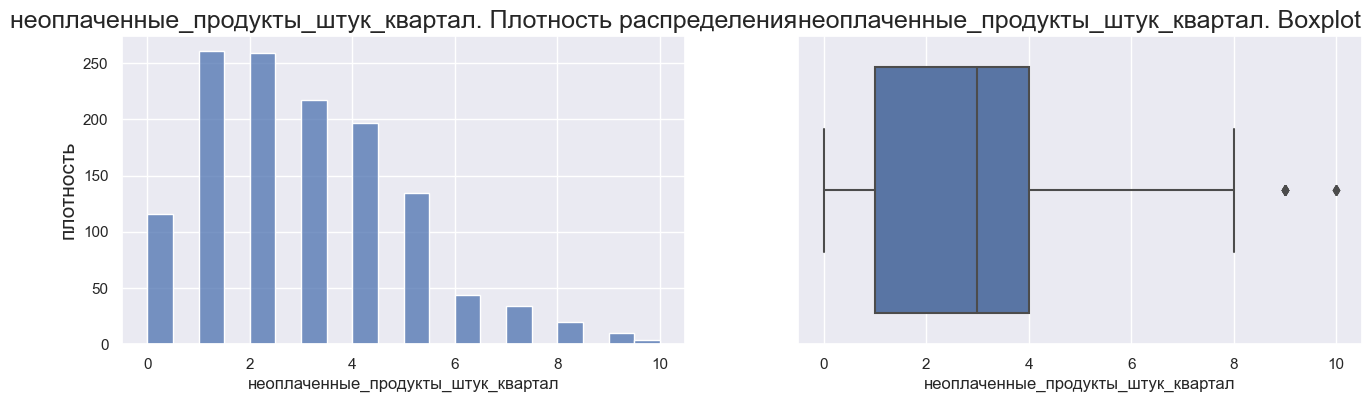

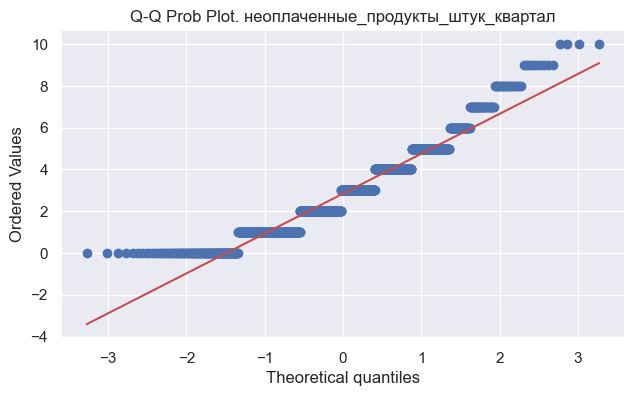

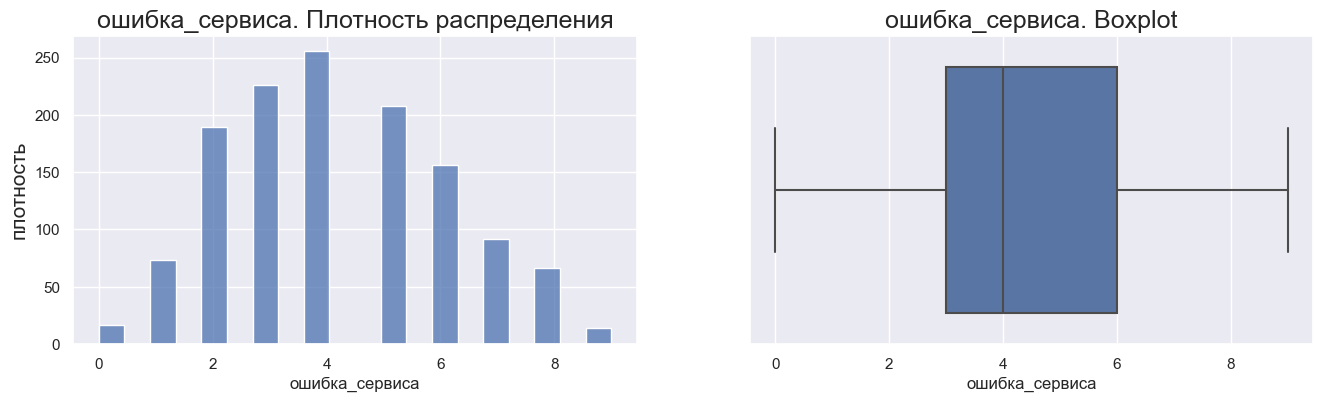

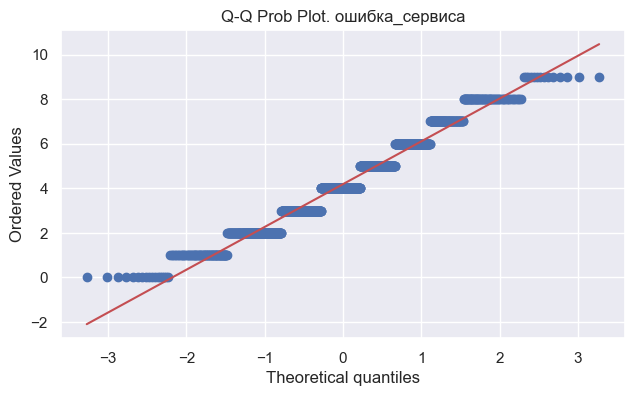

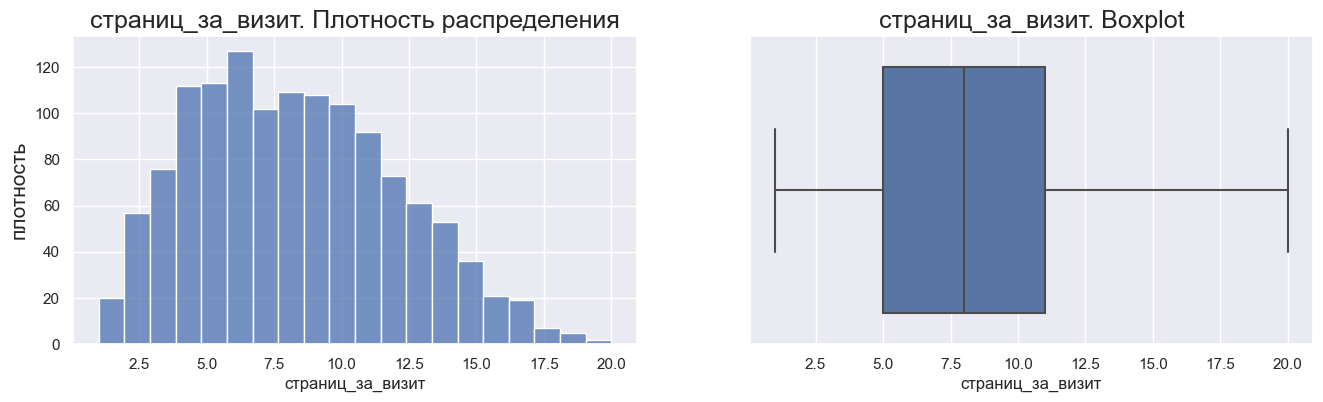

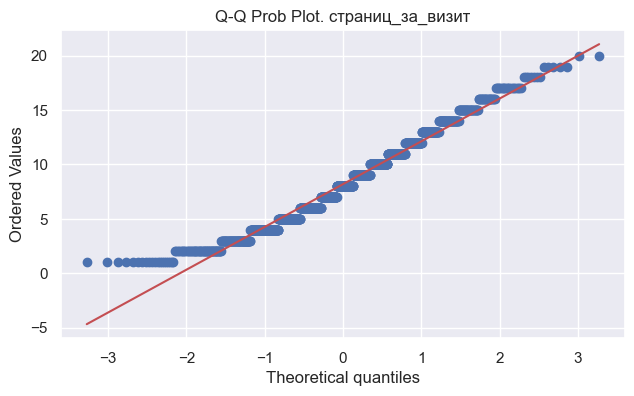

In [16]:
num_col = ['маркет_актив_6_мес',
           'маркет_актив_тек_мес',
           'длительность', 'акционные_покупки', 
           'средний_просмотр_категорий_за_визит',
           'неоплаченные_продукты_штук_квартал',
           'ошибка_сервиса',
           'страниц_за_визит'
           ]
for column in num_col:
    show_hists(market_file[column], column, num_bins=20)

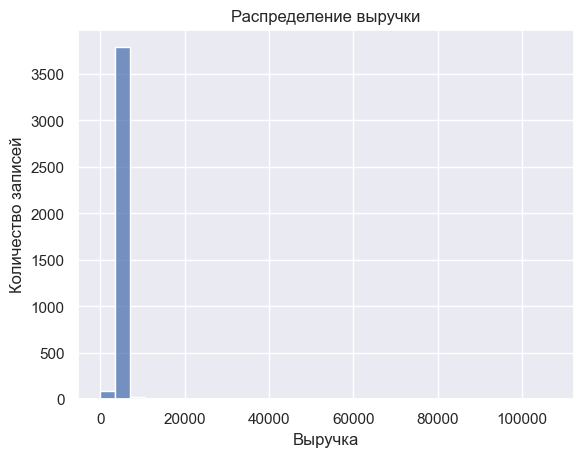

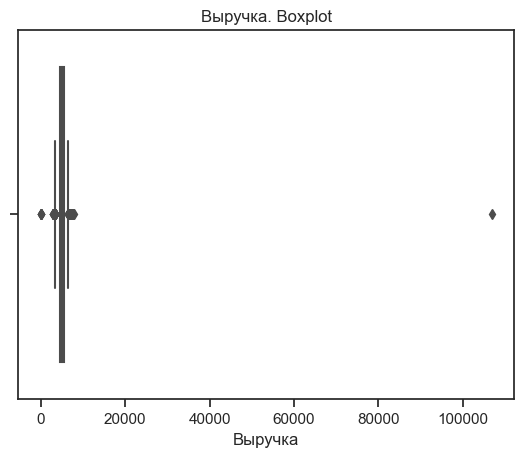

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
5%         3930.990000
25%        4590.150000
50%        4957.500000
75%        5363.000000
95%        6226.525000
99%        6957.737000
max      106862.200000
Name: выручка, dtype: float64

In [17]:
#распределение выручки с пользователей по месяцам


#market_money_grouped=market_money_grouped.query('выручка < 18488 & выручка > 12312')
ax = sns.histplot(market_money['выручка'], bins=30)

ax.set_title('Распределение выручки') 
plt.xlabel('Выручка')
plt.ylabel('Количество записей')


plt.show()


sns.set(style="ticks")
ax = sns.boxplot(data=market_money, x= market_money['выручка'])
ax.set_title('Выручка. Boxplot')
ax.set_xlabel('Выручка')


plt.show()
market_money['выручка'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]) 

Видим, что в столбце выручка присутствуют заметные выбросы.
Рассмотрим распределение выручки без учёта выбросов: данные от 5% до 99%

In [18]:
display( market_money.head(5))

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [19]:
#процент выбросов
display(len(market_money.query('выручка > 6958 or выручка < 3930'))/len(market_money)*100)
#таблица без выбросов
market_money_clean=market_money.query('выручка < 6958 & выручка > 3930')

market_money1=market_money_clean.query('период == ["препредыдущий_месяц"]')
market_money2=market_money_clean.query('период == ["предыдущий_месяц"]')
market_money3=market_money_clean.query('период == ["текущий_месяц"]')

market_money1=market_money1.query('выручка < 20000')
market_money2=market_money2.query('выручка < 20000')
market_money3=market_money3.query('выручка < 20000')


5.9743589743589745

период
текущий_месяц          5179.95
предыдущий_месяц       5005.00
препредыдущий_месяц    4809.00
Name: выручка, dtype: float64

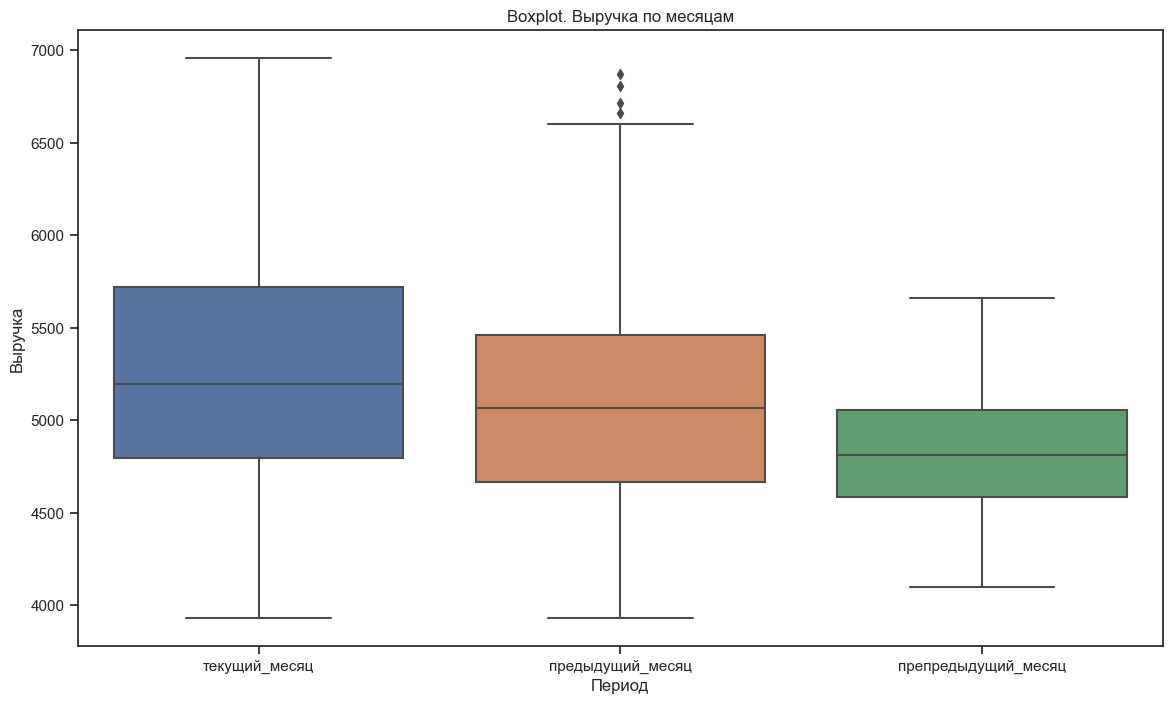

In [20]:
show_period = (market_money.groupby('период')['выручка'].agg('median').sort_values(ascending=False))
display(show_period)
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=market_money_clean, y="выручка", x='период', order = show_period.index)
ax.set_title('Boxplot. Выручка по месяцам')
ax.set_xlabel('Период')
ax.set_ylabel('Выручка')

plt.show()








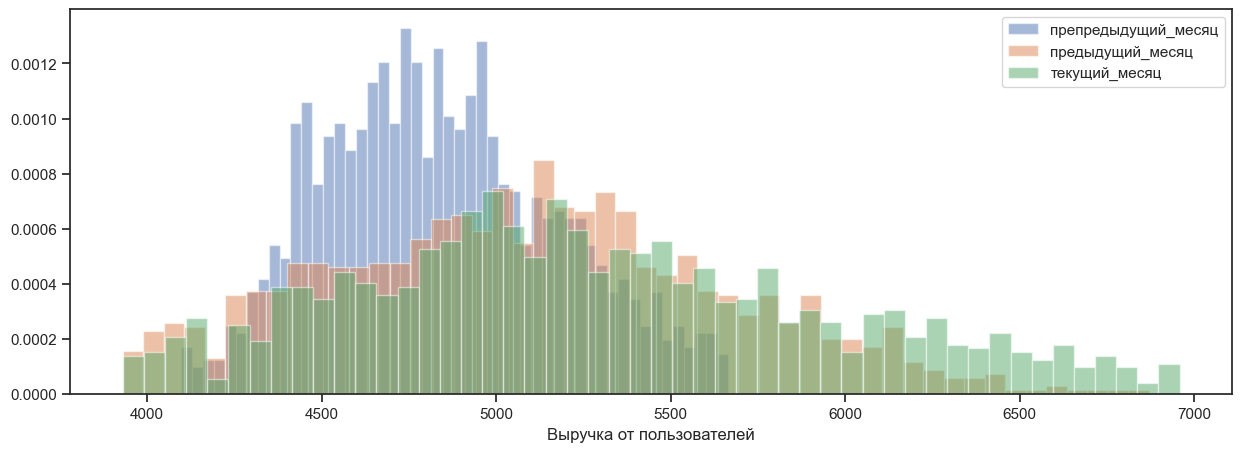

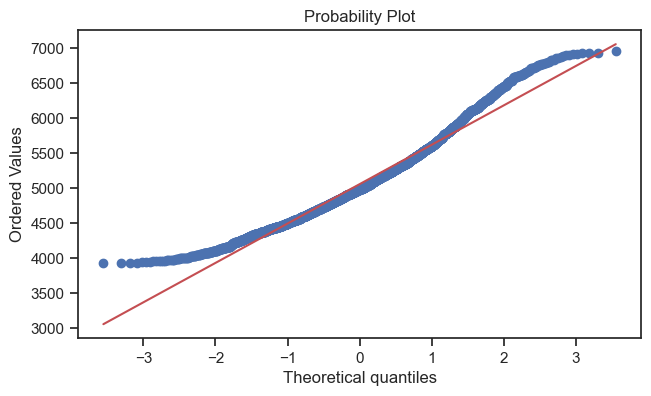

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
5%          7.000000
25%        10.000000
50%        13.000000
75%        16.000000
95%        20.000000
99%        22.000000
max        23.000000
Name: минут, dtype: float64

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))



ax.hist(market_money1['выручка'], 50, alpha=0.5, density=True, label='препредыдущий_месяц')
ax.hist(market_money2['выручка'], 50, alpha=0.5, density=True, label='предыдущий_месяц')
ax.hist(market_money3['выручка'], 50, alpha=0.5, density=True, label='текущий_месяц')
plt.xlabel('Выручка от пользователей')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(market_money_clean['выручка'], dist="norm", plot=plt)
ax.set_title("Q-Q Prob Plot. " + 'Выручка' )
plt.show()

plt.show()
market_time['минут'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]) 

Видим изменении в покупательском поведении за три месяца:  
    в предпредыдущем месяце больша доля выручки с пользователя находилась в промежутке от 4400 до 5500 руб.  
    к текущему месяцу картина изменилась - расширился диапозон выручки до 4400-6600 руб.  
    при этом медианная выручка выросла c 4809 до 5180 руб.

In [22]:

market_time1=market_time.query('период == ["предыдущий_месяц"]')
market_time2=market_time.query('период == ["текущий_месяц"]')


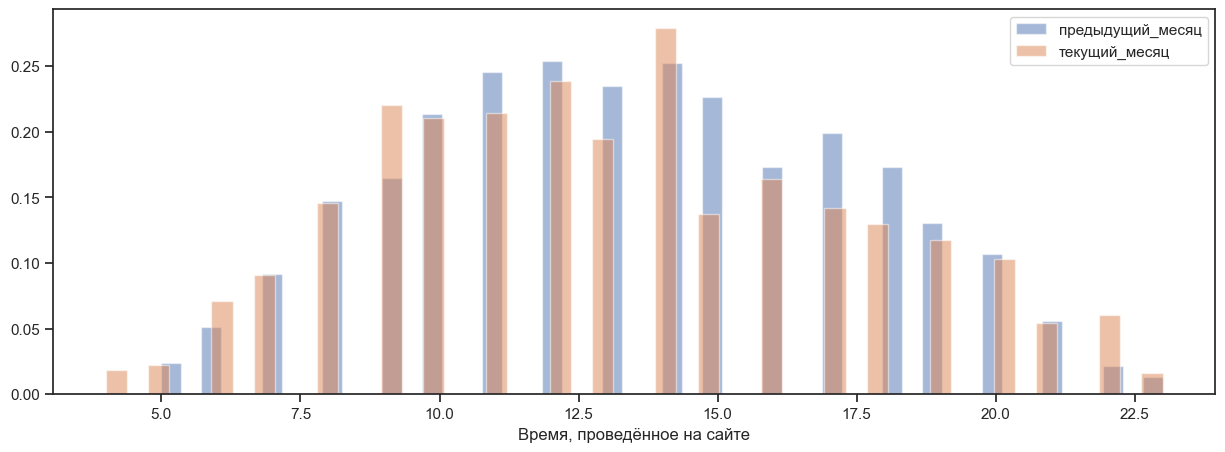

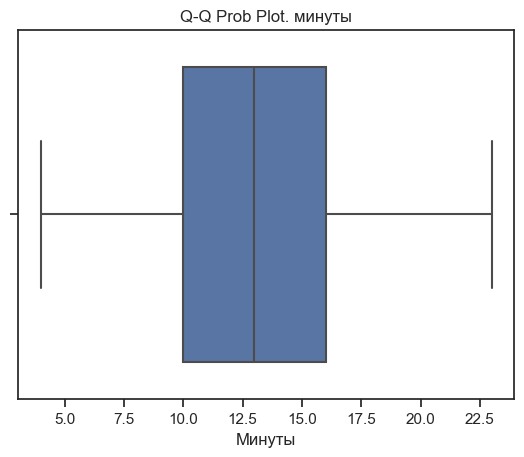

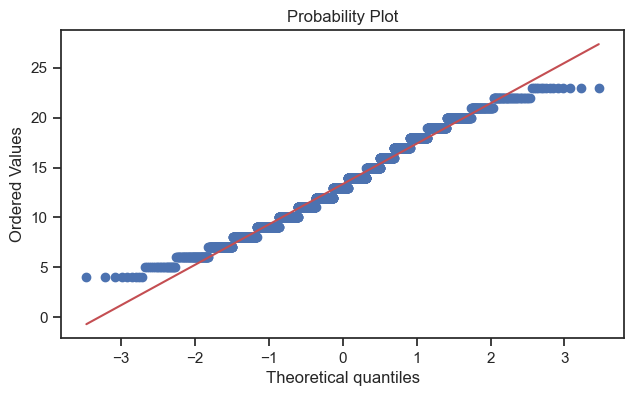

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
5%          7.000000
25%        10.000000
50%        13.000000
75%        16.000000
95%        20.000000
99%        22.000000
max        23.000000
Name: минут, dtype: float64

In [23]:
#распределение по времени нахождения на сайте
#market_time_grouped = market_time.groupby('id')['минут'].sum().reset_index()
#display(market_time_grouped.head(5))
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(market_time1['минут'], 50, alpha=0.5, density=True, label='предыдущий_месяц')
ax.hist(market_time2['минут'], 50, alpha=0.5, density=True, label='текущий_месяц')
plt.xlabel('Время, проведённое на сайте')
plt.legend()
plt.show()



sns.set(style="ticks")
ax = sns.boxplot(data=market_time, x= market_time['минут'])
ax.set_title('Boxplot. Минуты')
ax.set_xlabel('Минуты')

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(market_time['минут'], dist="norm", plot=plt)
ax.set_title("Q-Q Prob Plot. " + 'минуты' )
plt.show()

plt.show()
market_time['минут'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]) 


In [24]:
display(market_time.groupby('период')['минут'].agg('median').sort_values(ascending=False))

период
предыдущий_месяц    13.0
текущий_месяц       13.0
Name: минут, dtype: float64

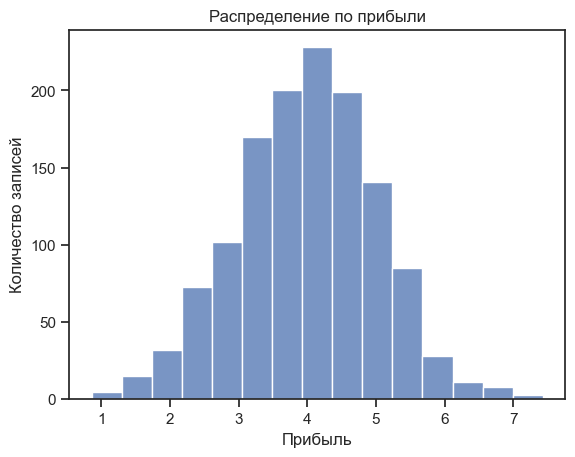

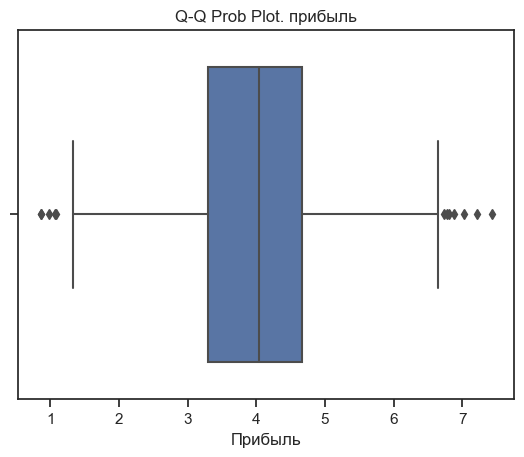

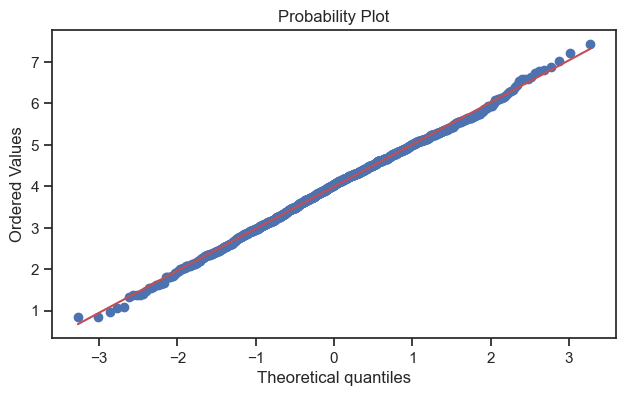

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
5%          2.329500
25%         3.300000
50%         4.045000
75%         4.670000
95%         5.580500
99%         6.400400
max         7.430000
Name: прибыль, dtype: float64

In [25]:
#распределение прибыли с пользователя
#распределение по времени нахождения на сайте


ax = sns.histplot(money['прибыль'], bins=15)

ax.set_title('Распределение по прибыли') 
plt.xlabel('Прибыль')
plt.ylabel('Количество записей')


plt.show()


sns.set(style="ticks")
ax = sns.boxplot(data=money, x= money['прибыль'])
ax.set_title('Распределение по прибыли')
ax.set_xlabel('Прибыль')

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(money['прибыль'], dist="norm", plot=plt)
ax.set_title("Q-Q Prob Plot. " + 'прибыль' )
plt.show()

plt.show()
money['прибыль'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]) 

In [26]:
#распределение категориальных данных

def show_pie(data, data_label1):
    data.value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(data_label1)
    plt.show()
display(market_file.head(5))

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4


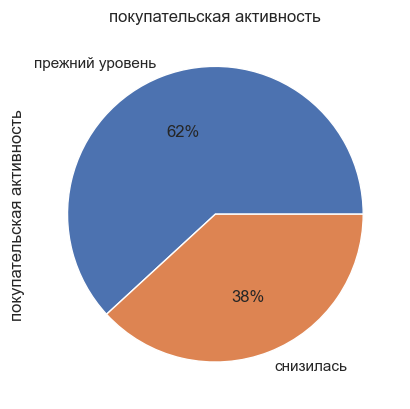

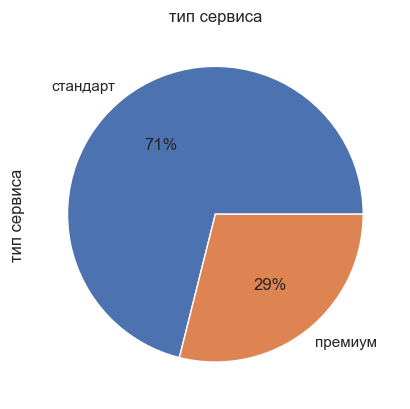

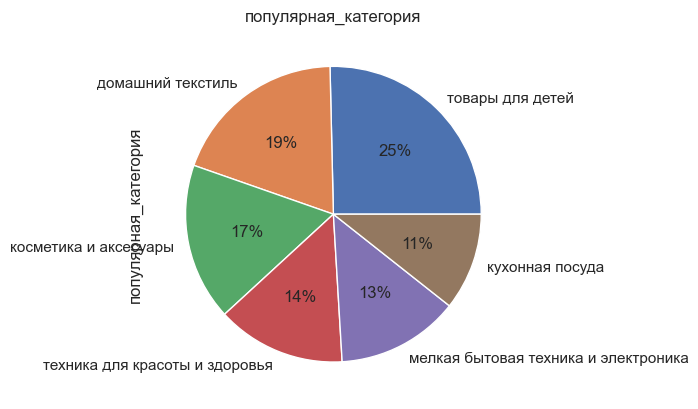

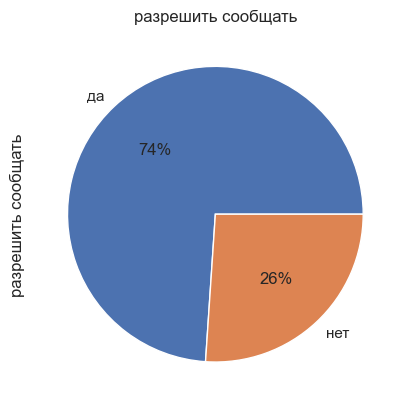

In [27]:
cat_col = ['покупательская активность', 'тип сервиса', 'популярная_категория', 'разрешить сообщать']
for column in cat_col:
    show_pie(market_file[column], column)

Были удалены 4 строки, в которых было замечено отсутствие покупок в течение одного из трёх месяц наблюдений.  

Был проведён исследовательский анализ, в ходе которого выявлены следующие ключевые явления:  
    1) В таблице с выручкой от каждого пользователя по месяцам market_money присутсвуют выбросы (около 6% ). Без их учета были построены графики распределения, "ящик с усами" и Q-Q Plot.
    Было замечено, что диапозон выручки за три месяца расширился, медиана выручки увеличилась с 4809 в предпредыдущем месяце до 5179.95 в текущем.  
    2) Признак "прибыль" в таблице money имеет распределение нормального вида, имеются выбросы.  
    3) Признак "минуты" в таблице market_time не отражает критических изменений в количестве времени, проведённом пользователями на сайте: медианное значение в текущем и предыдущем месяце (13 минут) не изменилось  
    4) Среди категориальных признаков отметим следующее:  
        - разрешение на рассылки дали 74%  
        - самая популярная категория товаров - "Товары для детей" (25%), наименее популярная - "Кухонная посуда" (11%)  
        - 71% пользователей имеет стандартный тип севриса  
        - 62% процента покупателей были отмечены неизменившейся покупательской активностью  
    5) медиана маркитенговой активности за 6 месяцев (число звонков, рассылок и т.п.) находится на уровне 4  
    6) медиана количества дней с момента регистрации на сайте (параметр "длительность") на уровне 600  
    7) по распределению доли акционных покупок за 6 месяцев видно разделение на две группы:  0.1-0.45 и 0.85-0.99.   
    8) медиана просмотренных категорий за визит равна трём
    9) медиана количества просмотренных страниц = 8
    10) медиана количества ошибок сервиса, коснувшихся пользователей равна 4   

#### Объединение таблиц

In [28]:
market_file.info()
market_money.info()
market_time.info()
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская активность            1297 non-null   object 
 2   тип сервиса                          1297 non-null   object 
 3   разрешить сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [29]:
#удаление выбросов по признаку "выручка" перед слиянием таблиц
display(len(market_money.query('выручка > 106862')), market_money.query('выручка > 106862'))

1

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [30]:
#имеем один очевидный выброс по выручке в 106862

market_money=market_money.query('выручка < 106862')

In [31]:




market_time.loc[market_time['период']=='предыдцщий_месяц', 'период'] = 'предыдущий_месяц'
 
mm1 = market_money[market_money['период']== 'препредыдущий_месяц']
mm1.columns = ['id', 'период1', 'выручка1']
df_market_file = market_file.merge(mm1)
mm2 = market_money[market_money['период']== 'предыдущий_месяц']
mm2.columns = ['id', 'период2', 'выручка2']
df_market_file = df_market_file.merge(mm2)
mm3 = market_money[market_money['период']== 'текущий_месяц']
mm3.columns = ['id', 'период3', 'выручка3']
df_market_file = df_market_file.merge(mm3)
 
t2 = market_time[market_time['период']== 'предыдущий_месяц']
t2.columns = ['id', 'период2', 'минуты2']
df_market_file = df_market_file.merge(t2, on=['id', 'период2'])
t3 = market_time[market_time['период']== 'текущий_месяц']
t3.columns = ['id', 'период3', 'минуты3']
df_market_file = df_market_file.merge(t3, on=['id', 'период3'])

In [32]:
display(df_market_file.head(5), df_market_file.info(), df_market_file.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская активность            1296 non-null   object 
 2   тип сервиса                          1296 non-null   object 
 3   разрешить сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,период1,выручка1,период2,выручка2,период3,выручка3,минуты2,минуты3
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,препредыдущий_месяц,4472.0,предыдущий_месяц,5216.0,текущий_месяц,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,препредыдущий_месяц,4826.0,предыдущий_месяц,5457.5,текущий_месяц,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,препредыдущий_месяц,4793.0,предыдущий_месяц,6158.0,текущий_месяц,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,препредыдущий_месяц,4594.0,предыдущий_месяц,5807.5,текущий_месяц,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,препредыдущий_месяц,5124.0,предыдущий_месяц,4738.5,текущий_месяц,5388.5,10,10


None

0

In [33]:
df_market_file=df_market_file.drop(['период1','период2', 'период3'], axis=1)
display(df_market_file.head(5), df_market_file.info(), df_market_file.duplicated().sum())
                                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская активность            1296 non-null   object 
 2   тип сервиса                          1296 non-null   object 
 3   разрешить сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


None

0

Было произведено слияние таблиц market_file , market_money , market_time в одну.  
В текущей таблице 1296 записей.

#### Корреляционный анализ данных

In [34]:

interval_cols = ['маркет_актив_6_мес', 
                 'маркет_актив_тек_мес',
                 'длительность',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит',
                 'выручка1',
                 'выручка2',
                 'выручка3',
                 'минуты2',
                 'минуты3'
                ]


phik_overview = phik_matrix(df_market_file, interval_cols=interval_cols) 

The number of unique values of variable id is large: 1296. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.


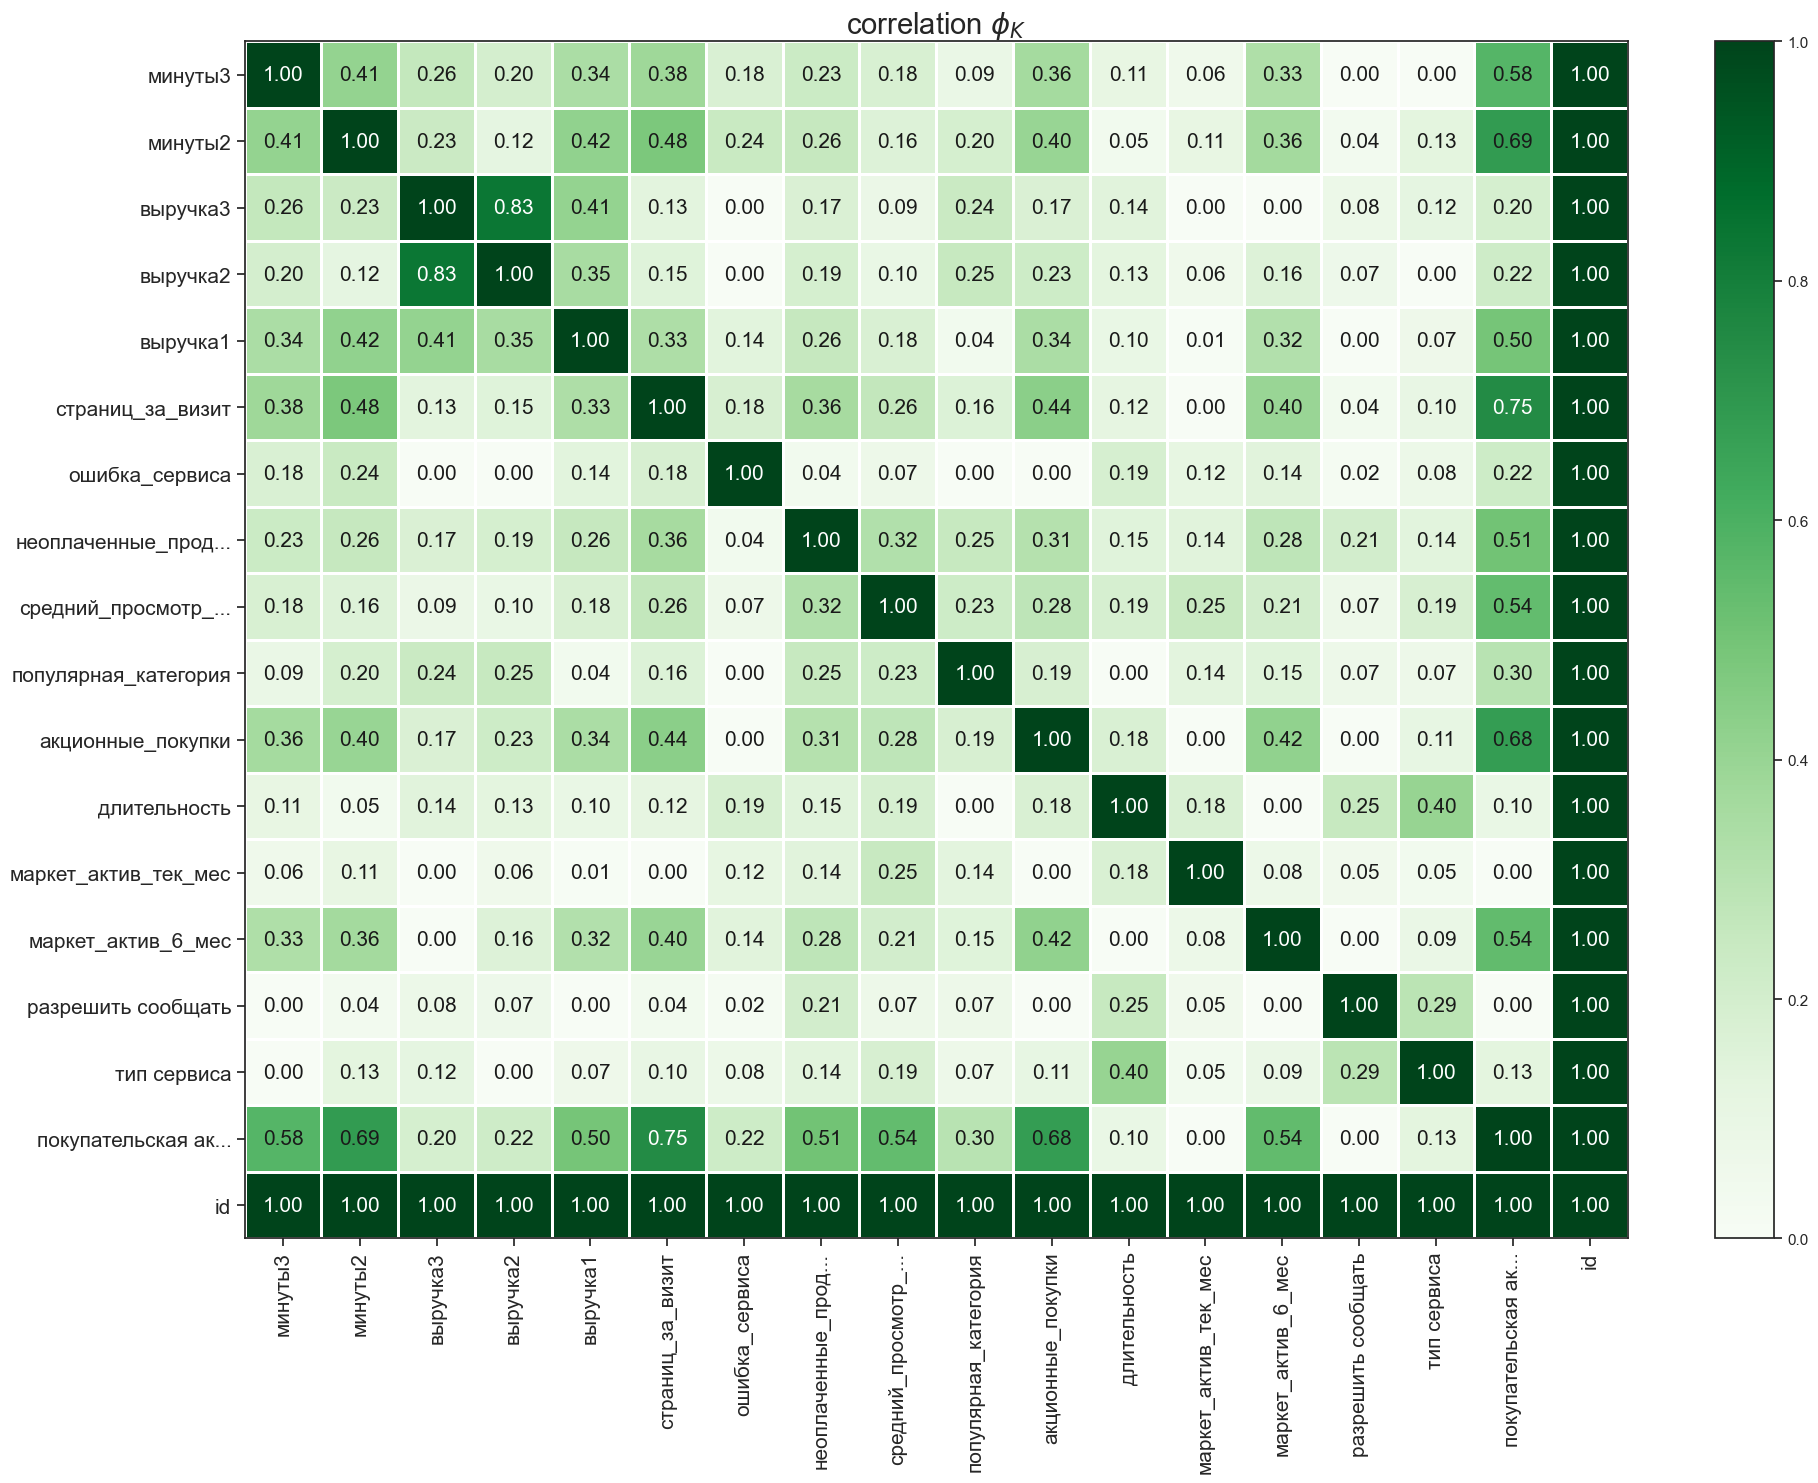

In [35]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Мультиколлинеарность (коэффициент корреляции > 0.9) не наблюдается, необходимости в удалении признаков нет.
Наиболее сильная корреляция наблюдается среди признаков у покупательской активности с количестовм проведённого времени на сайте (минуты2 (0.64), минуты3(0.58)), выручка за препредыдущий период(выручка1(0.50)), количество просмотренных страниц за визит(0.75), акционные покупки(0.68), маркетинговой активностью(0.54), неоплаченными товарами(0.51) в корзине и средний просмотр категорий за визит(0.54).  


#### Приминение пайплайнов

In [36]:
display(df_market_file.head(5))

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [37]:
#замена строковых значений целевого признака на бинарные
df_market_file['покупательская активность'] = df_market_file['покупательская активность'].apply(lambda x: 1 if x=='снизилась' else 0)
display(df_market_file['покупательская активность'].sum())


494

In [38]:
display(df_market_file.head(5))


,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3
0,215349,1,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,1,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,1,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,1,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,1,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [39]:
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    df_market_file.drop(['покупательская активность','id'], axis=1),
    df_market_file['покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_market_file['покупательская активность'])

X_train.shape, X_test.shape

((972, 16), (324, 16))

In [46]:

ohe_columns = ['тип сервиса', 'разрешить сообщать', 'популярная_категория']

num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса',
               'страниц_за_визит',
               'выручка1',
               'выручка2',
               'выручка3',
               'минуты2',
               'минуты3'
              ]

In [47]:

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [48]:

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [49]:

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [50]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

In [51]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['тип '
                                                                                'сервиса',
                                                                                'разрешить '
                                                                                'сообщать',
                                                                                'популярная_категория']...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [52]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип сервиса',
                                                   'разрешить сообщать',
                                                   'популярная_категория']),
                        

In [53]:
result = pd.DataFrame(randomized_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
7,1,"LogisticRegression(penalty='l1', random_state=...",0.896593,"{'preprocessor__num': MinMaxScaler(), 'models_..."
0,2,KNeighborsClassifier(),0.875771,"{'preprocessor__num': StandardScaler(), 'model..."
3,3,KNeighborsClassifier(),0.847439,"{'preprocessor__num': MinMaxScaler(), 'models_..."
5,4,KNeighborsClassifier(),0.823203,"{'preprocessor__num': MinMaxScaler(), 'models_..."
4,5,DecisionTreeClassifier(random_state=42),0.804804,"{'preprocessor__num': StandardScaler(), 'model..."
2,6,DecisionTreeClassifier(random_state=42),0.800193,"{'preprocessor__num': MinMaxScaler(), 'models_..."
6,7,DecisionTreeClassifier(random_state=42),0.775998,"{'preprocessor__num': MinMaxScaler(), 'models_..."
9,8,DecisionTreeClassifier(random_state=42),0.769432,"{'preprocessor__num': StandardScaler(), 'model..."
1,9,DecisionTreeClassifier(random_state=42),0.734075,"{'preprocessor__num': StandardScaler(), 'model..."
8,10,DecisionTreeClassifier(random_state=42),0.706369,"{'preprocessor__num': MinMaxScaler(), 'models_..."


In [54]:
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика roc_auc на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика roc_auc на тестовой выборке: 0.893156170367674


Для оценки моделей обратимся к метрике ROC-AUC исходя из следующих факторов:
    - в выборке не наблюдается дисбаланс классов: соотношение двух классов покупательской активности снизилась(38%) и осталась прежней(62%)  
    - перед моделью стоит задача бинарной классификации - предсказать состояние покупательской активности одной из двух категорий  
    - ROC-AUC даёт адекватную оценку модели, оценивает зависимость отношений истиннно положительных и ложно положительных результатов.  
С помощью пайплайна была определена модель по метрике ROC-AUC, подходящая для составления прогноза:
    модель логистической регрессии с параметрами: C=2, penalty='l1', random_state=42, solver='liblinear'  
    ROC-AUC на тренировочной выборке =  0.896
    ROC-AUC на тестовой выборке =  0.893

#### Анализ важности признаков

In [55]:
ohe_pipe = randomized_search.best_estimator_['preprocessor'].transformers[0][1]
num_pipe = randomized_search.best_estimator_['preprocessor'].transformers[1][1]
df_ohe = pd.DataFrame(ohe_pipe.fit_transform(X_train[ohe_columns]), columns = ohe_pipe[1].get_feature_names_out())
df_num = pd.DataFrame(num_pipe.fit_transform(X_train[num_columns]), columns = num_columns)
X = pd.concat([df_ohe, df_num], axis=1)

explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'], X)

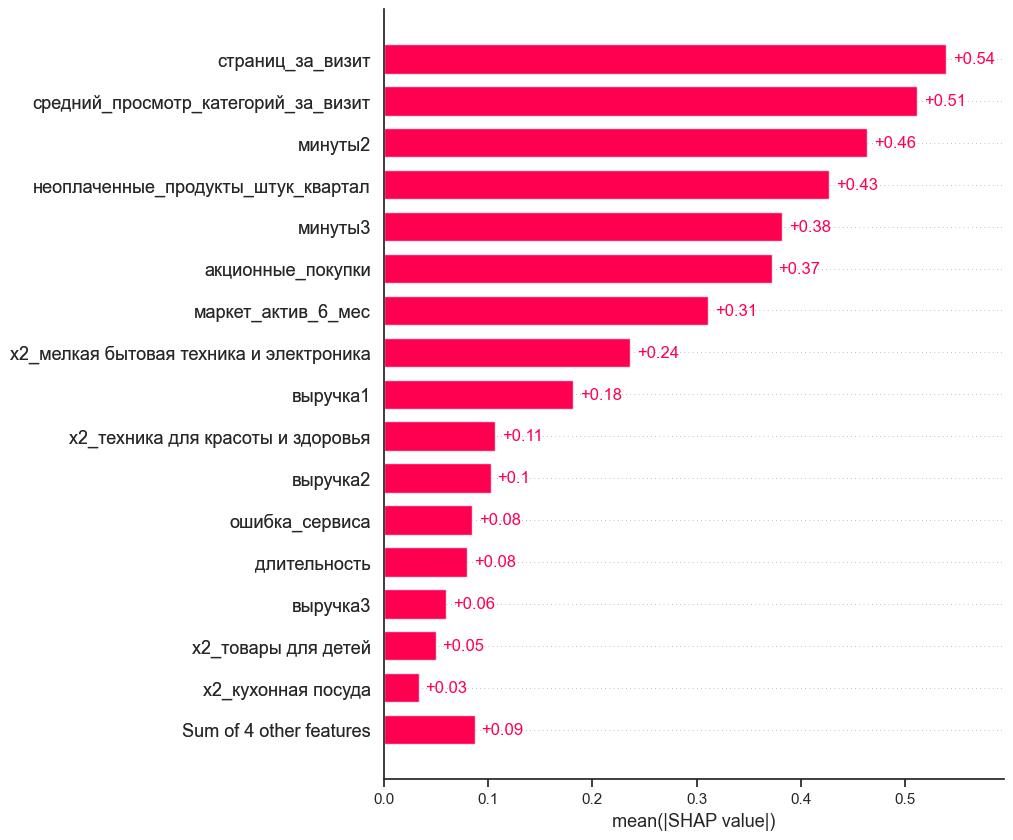

In [56]:

shap_values = explainer(X)
shap.plots.bar(shap_values, max_display=17) 

Самые весомые параметры:  
    - количество просмотренных страниц за визит  
    - количество просмотренных категорий за визит  
    - количество времени, проведённых на сайте во втором и третьем месяце наблюдейний  
    - количество неоплаченных продуктов  
    - акционные покупки  
    - маркетинкговая активность за 6 месяцев  

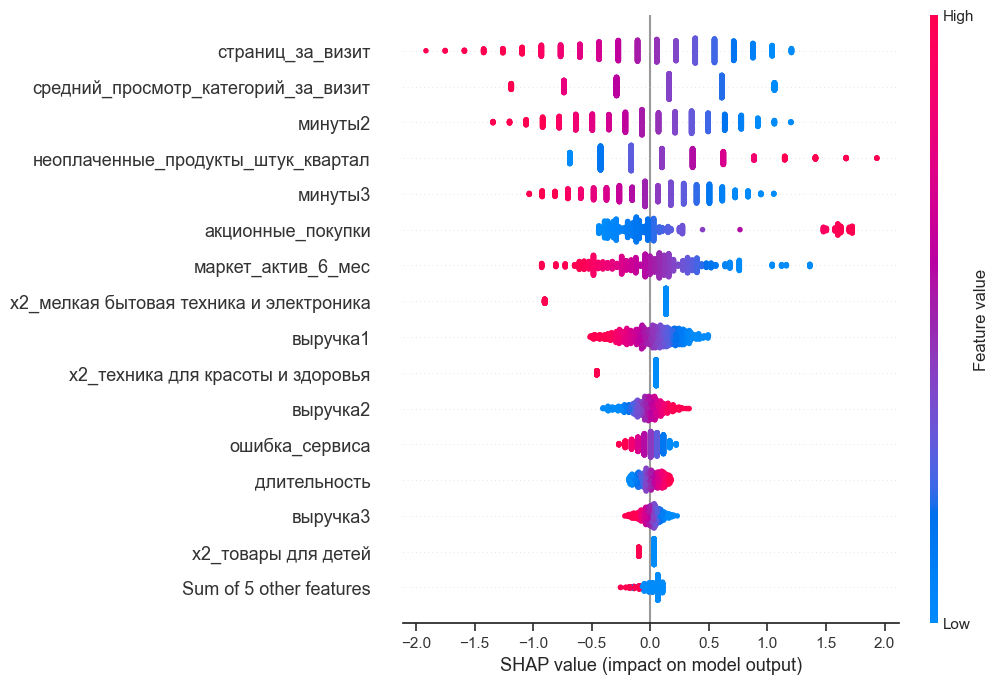

In [57]:
shap.plots.beeswarm(shap_values, max_display=16) 


Анализируя картину значений Шепли, можем выявить, что:  
    - признаки количество просмотренных страниц и категорий, 
    проведённых на сайте минут, маркетинговая активность за 6 месяцев склоняют  отнести объекты к классу 0 (активность не изменилась)  
    - признаки количества неоплаченных продуктов и акционных покупок сколняют отнести объекты к классу 1  
    - из категорий продуктов, сильнее всего влияют мелкая бытовая техника и электроника и техника для красоты и здоровья - склоняют к классу 0.
    

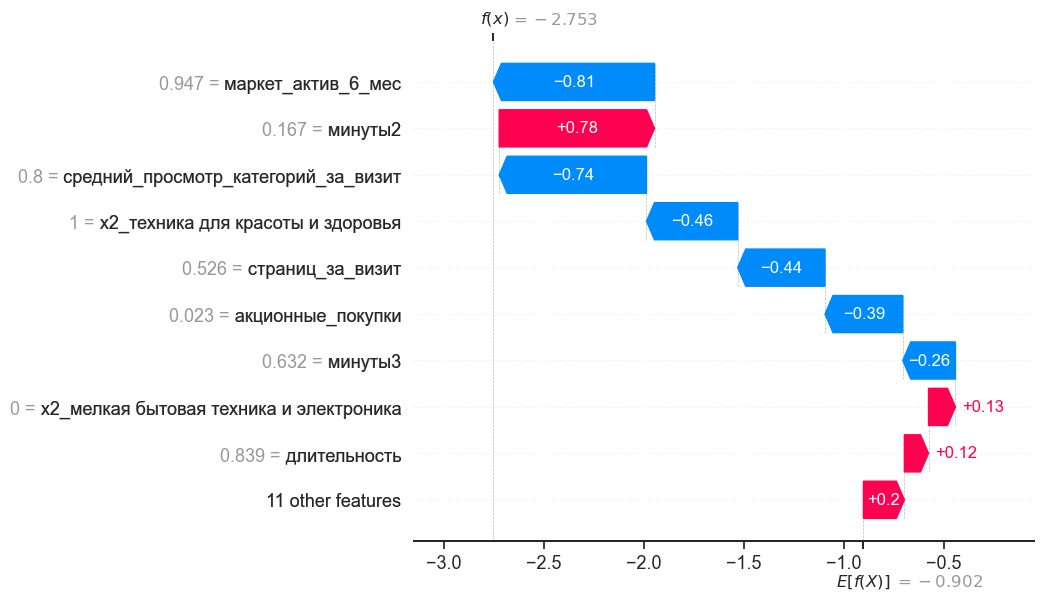

In [58]:
shap.plots.waterfall(shap_values[10]) 


Признаки, определяющие объект к классу 0:  
    - маркетинговая активность за 6 мес  
    - средний просмотр категорий  
    - категория товаров "техника для красоты и здоровья"  
    - количество просмотренных страниц за визит    
Таким образом можем предположить, что чем активнее кампания взаимодействует пользователя, и чем дольше пользователь подбирает товары на сайте, тем вероятнее произойдёт покупка.  



#### Сегментация покупателей

In [59]:
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__n_neighbors,param_models,param_models__max_features,param_models__max_depth,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014999,0.002092,0.158031,5.331293e-03,StandardScaler(),3,KNeighborsClassifier(),NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.883516,0.869889,0.878041,0.879054,0.868356,0.875771,0.005753,2
1,0.021802,0.002785,0.014403,4.893767e-04,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),2,2,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.719232,0.736389,0.764640,0.713570,0.736543,0.734075,0.017813,9
2,0.025005,0.000633,0.012602,1.019637e-03,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),3,4,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.764184,0.873833,0.816329,0.803773,0.742849,0.800193,0.045346,6
3,0.019604,0.002154,0.168438,3.006679e-03,MinMaxScaler(),3,KNeighborsClassifier(),NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.878993,0.880444,0.800732,0.844595,0.832432,0.847439,0.029999,3
4,0.023203,0.000400,0.014005,3.568323e-07,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),2,4,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.775575,0.790222,0.819426,0.830293,0.808502,0.804804,0.019719,5
5,0.022004,0.000634,0.155635,7.034874e-03,MinMaxScaler(),2,KNeighborsClassifier(),NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.855260,0.866667,0.783277,0.815146,0.795664,0.823203,0.032662,4
6,0.023204,0.000401,0.014203,4.004002e-04,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),2,3,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.752513,0.775056,0.812218,0.750056,0.790146,0.775998,0.023399,7
7,0.033209,0.001327,0.013203,7.482014e-04,MinMaxScaler(),NaN,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,2,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.896471,0.907778,0.888176,0.919707,0.870833,0.896593,0.016696,1
8,0.023407,0.000801,0.013202,1.720192e-03,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),3,2,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.667355,0.744389,0.709910,0.768694,0.641498,0.706369,0.047059,10
9,0.019205,0.001940,0.008601,7.976897e-04,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),3,3,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.744081,0.817944,0.772354,0.793694,0.719088,0.769432,0.035008,8


In [60]:
result2 = pd.DataFrame(pd.concat([pd.Series(randomized_search.predict_proba(X_test)[:,1]), pd.Series(X_test.index)], axis = 1))
result2.columns = ['вероятность_снижения', 'id']
display(result2)

,вероятность_снижения,id
0,0.012443,809
1,0.987127,302
2,0.110013,955
3,0.785987,149
4,0.513236,582
...,...,...
319,0.959451,77
320,0.046419,881
321,0.864638,364
322,0.205230,789


In [61]:
model = randomized_search.best_estimator_
result3 = pd.DataFrame(model.predict_proba(X_test)[:,1], columns = ['вероятность_снижения'], index=X_test.index)
one_test_file = X_test.merge(result3, left_index=True, right_index=True)
display(one_test_file.sort_values(by='вероятность_снижения'))

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения
423,стандарт,нет,5.0,4,157,0.15,мелкая бытовая техника и электроника,5,0,5,13,4934.0,4028.0,3372.8,19,16,0.002831
1058,премиум,да,4.8,3,939,0.11,домашний текстиль,6,1,7,12,4465.0,4273.0,4236.6,21,23,0.004179
1272,стандарт,да,5.4,5,806,0.17,домашний текстиль,6,1,8,11,5096.0,5565.5,6102.4,22,19,0.004415
1237,стандарт,да,4.1,5,447,0.14,косметика и аксесуары,6,0,9,12,5045.0,5430.5,5894.6,20,17,0.005988
1201,стандарт,да,6.1,4,298,0.27,домашний текстиль,6,3,6,16,5039.0,5028.5,5149.4,19,14,0.007554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,стандарт,нет,3.1,5,458,0.99,косметика и аксесуары,1,5,3,4,4308.0,4449.0,4459.4,8,10,0.995466
66,стандарт,нет,1.7,4,472,0.94,домашний текстиль,2,6,4,3,4661.0,5943.5,6427.1,8,11,0.996083
316,премиум,да,4.4,4,343,0.94,товары для детей,2,9,2,2,4723.0,5567.5,5293.2,6,9,0.997151
186,премиум,да,1.5,5,788,0.89,товары для детей,1,4,4,4,4641.0,6013.5,6900.1,8,4,0.997691


In [62]:
one_test_file = one_test_file.rename(columns={'тип сервиса': 'тип_сервиса'})
one_test_file['общая_выручка'] = one_test_file['выручка1'] + one_test_file['выручка2'] + one_test_file['выручка3']

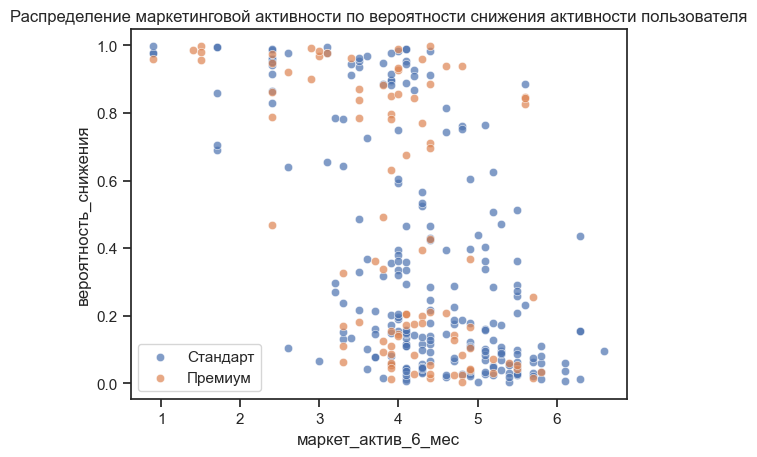

In [63]:
one_test_file_std = one_test_file.query('тип_сервиса == "стандарт"')
one_test_file_prem = one_test_file.query('тип_сервиса == "премиум"')
ax1 = sns.scatterplot(data=one_test_file_std, x='маркет_актив_6_мес', y='вероятность_снижения', alpha=0.7, label='Стандарт')
ax2 = sns.scatterplot(data=one_test_file_prem, x='маркет_актив_6_мес', y='вероятность_снижения', alpha=0.7, label='Премиум')
ax1.set_title('Распределение маркетинговой активности по вероятности снижения активности пользователя')
plt.show()

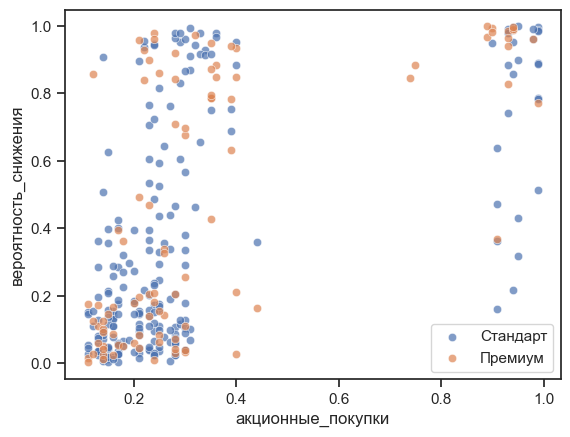

In [64]:
ax2 = sns.scatterplot(data=one_test_file_std, x='акционные_покупки', y='вероятность_снижения', alpha=0.7, label='Стандарт')
ax2 = sns.scatterplot(data=one_test_file_prem, x='акционные_покупки', y='вероятность_снижения', alpha=0.7, label='Премиум')
ax1.set_title('Распределение доли акционных покупок по вероятности снижения активности пользователя')
plt.show()

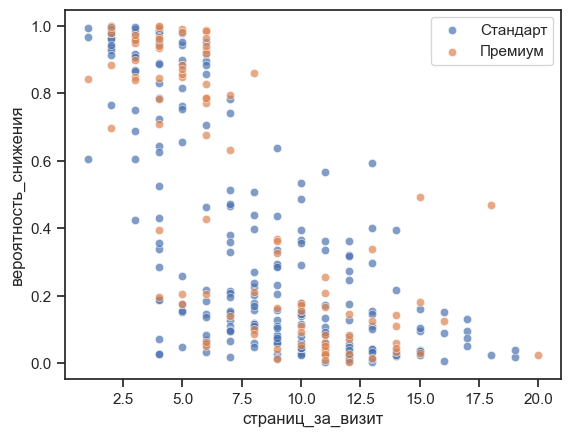

In [65]:
ax2 = sns.scatterplot(data=one_test_file_std, x='страниц_за_визит', y='вероятность_снижения', alpha=0.7, label='Стандарт')
ax2 = sns.scatterplot(data=one_test_file_prem, x='страниц_за_визит', y='вероятность_снижения', alpha=0.7, label='Премиум')
ax1.set_title('Распределение количества просмотренных страниц по вероятности снижения активности пользователя')
plt.show()

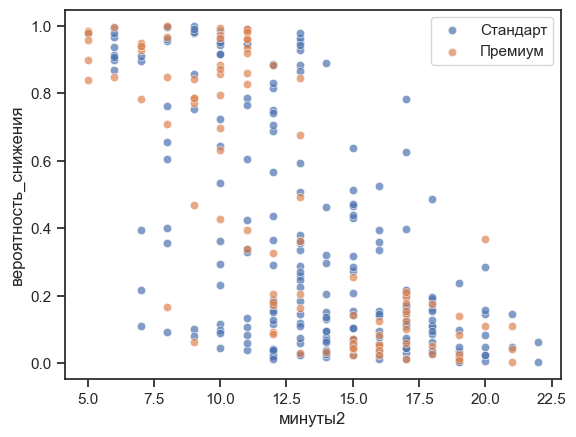

In [66]:
ax2 = sns.scatterplot(data=one_test_file_std, x='минуты2', y='вероятность_снижения', alpha=0.7, label='Стандарт')
ax2 = sns.scatterplot(data=one_test_file_prem, x='минуты2', y='вероятность_снижения', alpha=0.7, label='Премиум')
ax1.set_title('Распределение количества времени просмотра сайта по вероятности снижения активности пользователя')
plt.show()

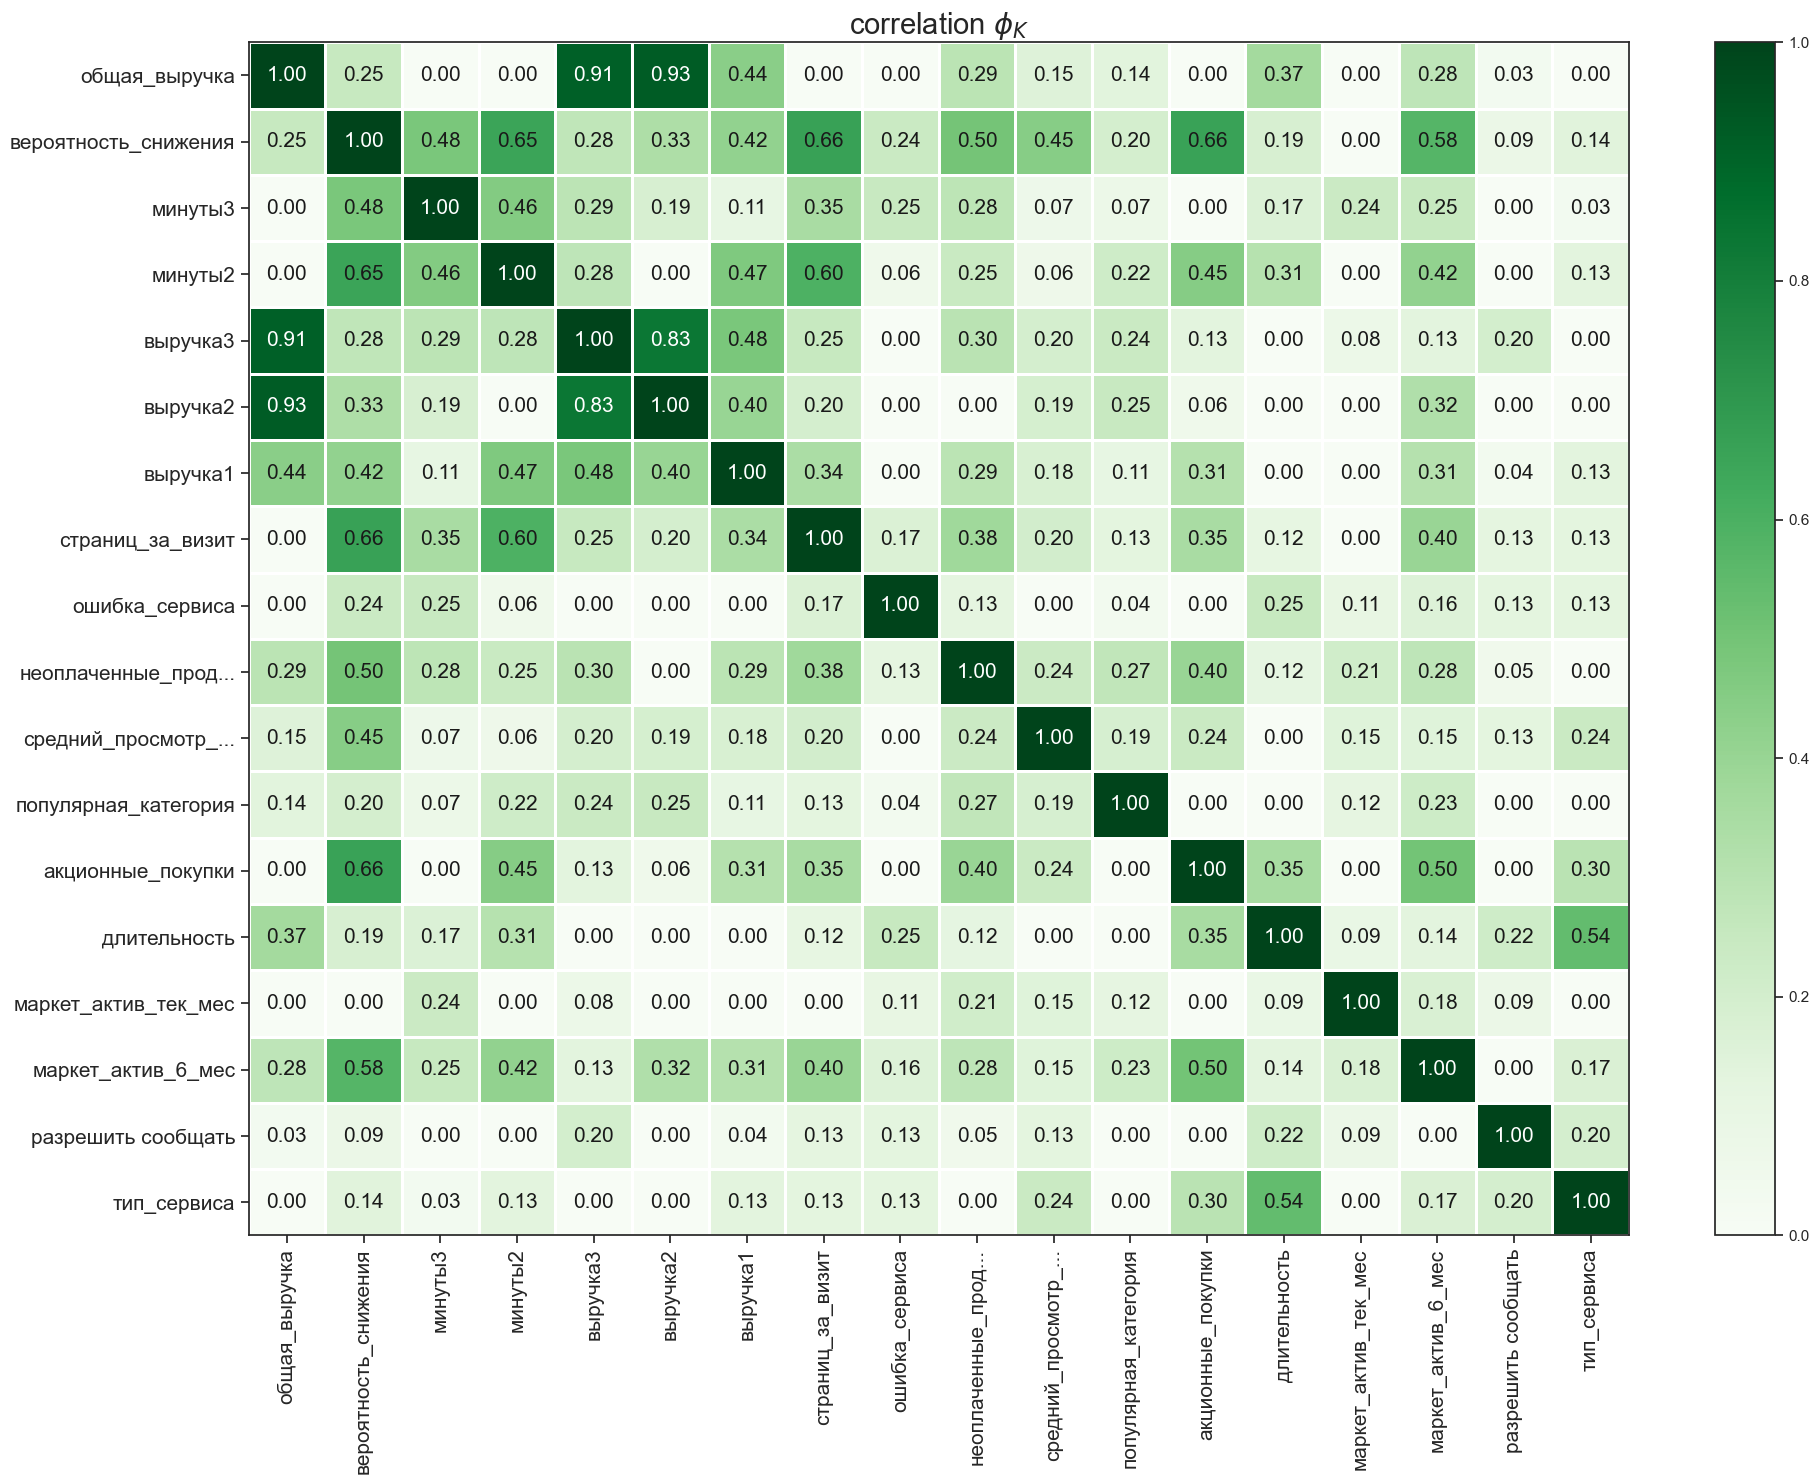

In [69]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['маркет_актив_6_мес', 
                 'маркет_актив_тек_мес',
                 'длительность',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит',
                 'выручка1',
                 'выручка2',
                 'выручка3',
                 'минуты2',
                 'минуты3',
                 'вероятность_снижения',
                 'общая_выручка'
                ]

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(one_test_file, interval_cols=interval_cols) 
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [68]:

display(one_test_file.head(5), one_test_file_std.describe(), one_test_file_prem.describe())

,тип_сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
809,стандарт,да,4.1,4,606,0.15,техника для красоты и здоровья,6,1,4,12,4912.0,3973.0,3289.2,16,17,0.012443,12174.2
302,премиум,нет,1.4,4,684,0.94,товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.987127,12374.7
955,премиум,да,3.3,4,488,0.13,домашний текстиль,4,2,8,10,4565.0,5444.0,6335.8,20,11,0.110013,16344.8
149,премиум,да,3.5,3,1057,0.35,домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.785987,18355.7
582,стандарт,нет,5.5,4,147,0.99,мелкая бытовая техника и электроника,1,2,3,7,4451.0,5090.0,5773.8,15,18,0.513236,15314.8


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,4.311790,3.973799,535.611354,0.315284,3.484716,2.711790,4.039301,8.205240,4819.222707,4901.703057,5245.970306,13.502183,12.969432,0.354574,14966.896070
std,1.051436,0.648354,224.680908,0.251278,1.422249,1.785637,1.904112,4.037844,327.189331,687.531343,811.100486,3.771575,4.146858,0.343471,1564.365269
min,0.900000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4138.000000,2960.000000,2952.200000,5.000000,4.000000,0.002831,10575.900000
25%,3.900000,4.000000,360.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4566.000000,4494.000000,4795.800000,11.000000,10.000000,0.074254,14014.000000
50%,4.300000,4.000000,544.000000,0.240000,3.000000,3.000000,4.000000,8.000000,4793.000000,4966.500000,5240.000000,13.000000,13.000000,0.185938,15155.300000
75%,5.100000,4.000000,715.000000,0.300000,5.000000,4.000000,5.000000,11.000000,5039.000000,5389.000000,5773.800000,16.000000,16.000000,0.638840,16105.600000
max,6.600000,5.000000,1022.000000,0.990000,6.000000,8.000000,9.000000,19.000000,5624.000000,6658.500000,7338.200000,22.000000,23.000000,0.997719,18838.800000


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,3.985263,3.936842,724.410526,0.355579,2.957895,2.789474,4.442105,8.000000,4844.831579,4979.905263,5206.351579,12.621053,13.178947,0.463729,15031.088421
std,1.009210,0.696657,238.036359,0.262884,1.202089,1.878743,2.157204,4.123106,287.340322,749.298166,830.338706,4.295418,4.896762,0.385283,1578.963406
min,0.900000,3.000000,150.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4265.000000,3155.000000,3363.600000,5.000000,4.000000,0.004179,11766.900000
25%,3.500000,3.000000,532.000000,0.190000,2.000000,1.000000,3.000000,5.000000,4643.500000,4480.750000,4620.350000,10.000000,9.000000,0.088719,13859.900000
50%,4.000000,4.000000,768.000000,0.260000,3.000000,3.000000,4.000000,7.000000,4821.000000,5052.500000,5182.900000,12.000000,13.000000,0.338923,15073.200000
75%,4.600000,4.000000,945.000000,0.375000,4.000000,4.000000,6.000000,11.000000,4994.000000,5500.750000,5784.700000,16.000000,17.000000,0.865847,16113.150000
max,5.800000,5.000000,1061.000000,0.990000,6.000000,10.000000,9.000000,20.000000,5614.000000,6604.000000,7370.600000,21.000000,23.000000,0.997691,18461.100000


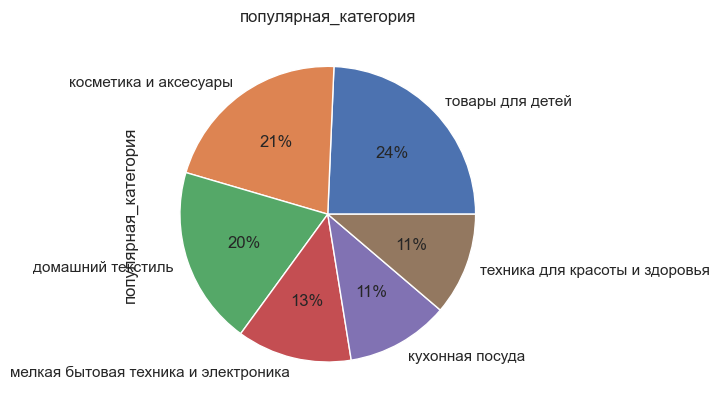

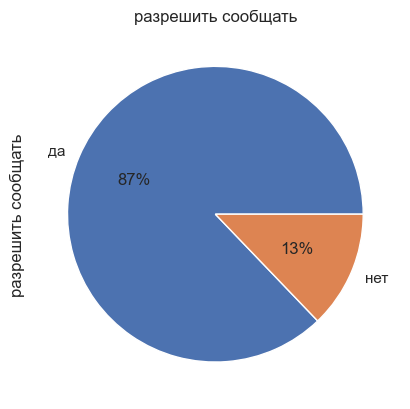

In [70]:

df_market_file_prem = df_market_file
df_market_file_prem = df_market_file_prem.rename(columns={'тип сервиса': 'тип_сервиса'})
df_market_file_prem = df_market_file_prem.query('тип_сервиса == "премиум"')
cat_col = [ 'популярная_категория', 'разрешить сообщать']
for column in cat_col:
    show_pie(df_market_file_prem[column], column)

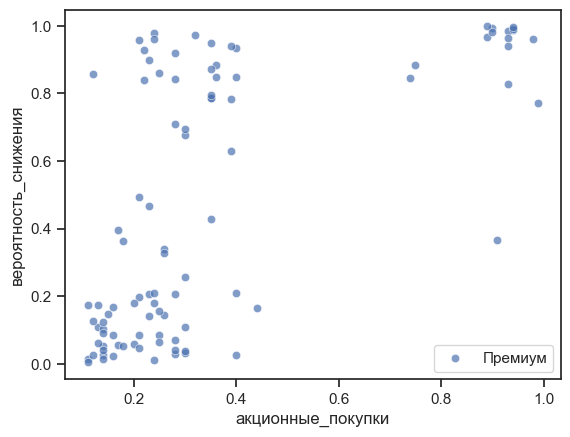

In [71]:
ax2 = sns.scatterplot(data=one_test_file_prem, x='акционные_покупки', y='вероятность_снижения', alpha=0.7, label='Премиум')

ax1.set_title('Распределение доли акционных покупок по вероятности снижения активности пользователя')
plt.show()

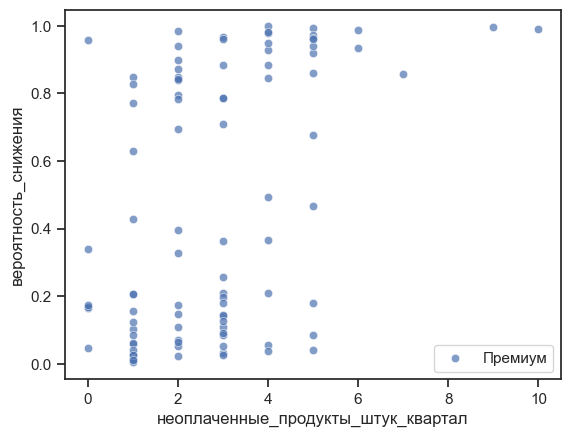

In [72]:
ax2 = sns.scatterplot(data=one_test_file_prem, x='неоплаченные_продукты_штук_квартал', y='вероятность_снижения', alpha=0.7, label='Премиум')

ax1.set_title('Распределение неоплаченных продуктов по вероятности снижения активности пользователя')
plt.show()

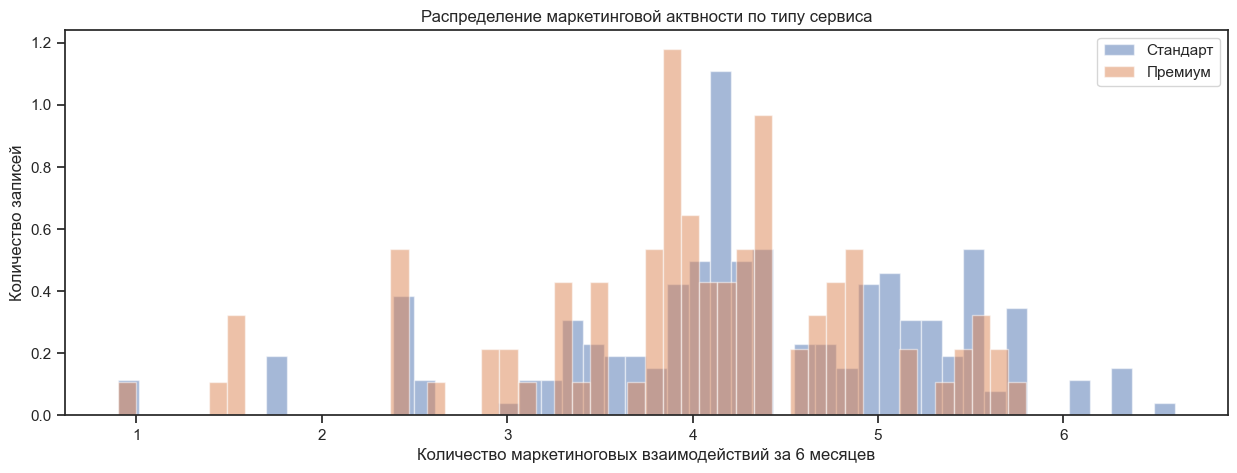

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(one_test_file_std['маркет_актив_6_мес'],50, alpha=0.5, density=True, label='Стандарт')
ax.hist(one_test_file_prem['маркет_актив_6_мес'],50, alpha=0.5, density=True, label='Премиум')
ax.set_title('Распределение маркетинговой актвности по типу сервиса') 
plt.xlabel('Количество маркетиноговых взаимодействий за 6 месяцев')
plt.ylabel('Количество записей')

plt.legend()
plt.show()

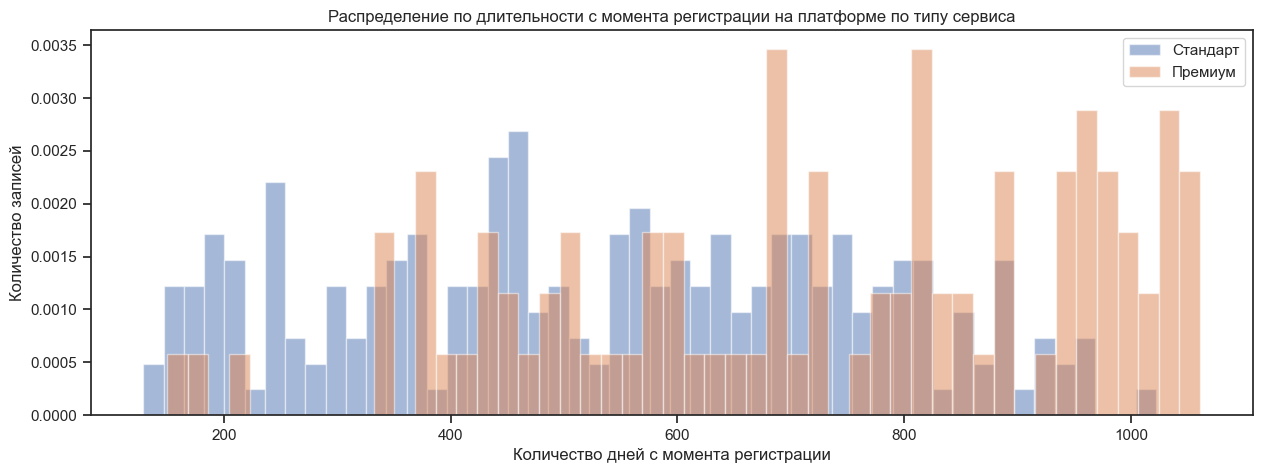

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(one_test_file_std['длительность'],50, alpha=0.5, density=True, label='Стандарт')
ax.hist(one_test_file_prem['длительность'],50, alpha=0.5, density=True, label='Премиум')
ax.set_title('Распределение по длительности с момента регистрации на платформе по типу сервиса') 
plt.xlabel('Количество дней с момента регистрации')
plt.ylabel('Количество записей')

plt.legend()
plt.show()

In [75]:
display(one_test_file_prem.head(5))

,тип_сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
302,премиум,нет,1.4,4,684,0.94,товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.987127,12374.7
955,премиум,да,3.3,4,488,0.13,домашний текстиль,4,2,8,10,4565.0,5444.0,6335.8,20,11,0.110013,16344.8
149,премиум,да,3.5,3,1057,0.35,домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.785987,18355.7
867,премиум,да,4.1,3,784,0.23,косметика и аксесуары,2,1,6,6,5614.0,5198.5,4968.4,13,20,0.206001,15780.9
492,премиум,да,4.3,4,1041,0.99,кухонная посуда,4,1,6,6,4880.0,5339.0,5866.8,9,14,0.771676,16085.8


In [76]:

display(one_test_file_prem.head(5), one_test_file_prem.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 302 to 881
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          95 non-null     object 
 1   разрешить сообщать                   95 non-null     object 
 2   маркет_актив_6_мес                   95 non-null     float64
 3   маркет_актив_тек_мес                 95 non-null     int64  
 4   длительность                         95 non-null     int64  
 5   акционные_покупки                    95 non-null     float64
 6   популярная_категория                 95 non-null     object 
 7   средний_просмотр_категорий_за_визит  95 non-null     int64  
 8   неоплаченные_продукты_штук_квартал   95 non-null     int64  
 9   ошибка_сервиса                       95 non-null     int64  
 10  страниц_за_визит                     95 non-null     int64  
 11  выручка1                       

,тип_сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
302,премиум,нет,1.4,4,684,0.94,товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.987127,12374.7
955,премиум,да,3.3,4,488,0.13,домашний текстиль,4,2,8,10,4565.0,5444.0,6335.8,20,11,0.110013,16344.8
149,премиум,да,3.5,3,1057,0.35,домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.785987,18355.7
867,премиум,да,4.1,3,784,0.23,косметика и аксесуары,2,1,6,6,5614.0,5198.5,4968.4,13,20,0.206001,15780.9
492,премиум,да,4.3,4,1041,0.99,кухонная посуда,4,1,6,6,4880.0,5339.0,5866.8,9,14,0.771676,16085.8


None

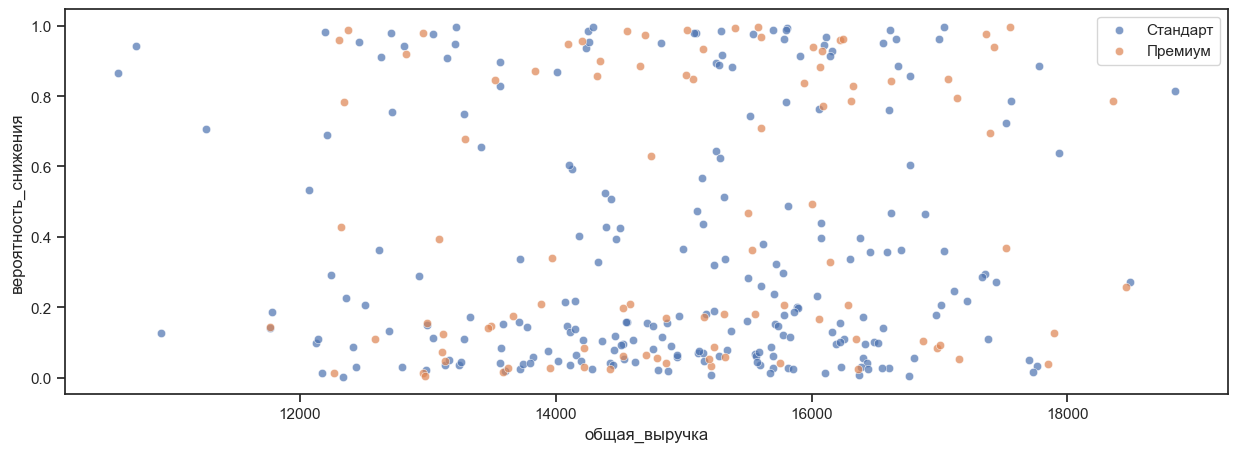

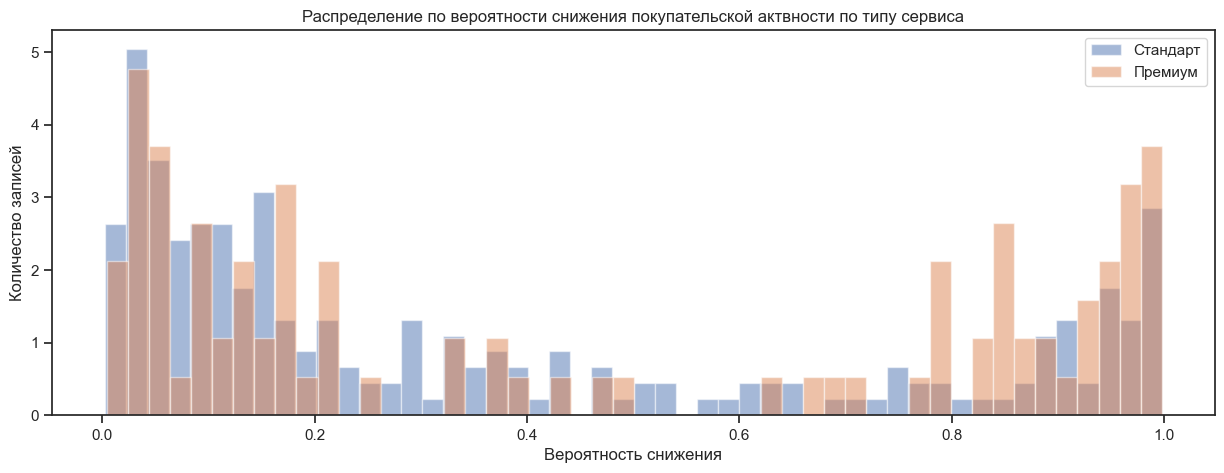

In [77]:
fig, ax2 = plt.subplots(figsize=(15, 5))
ax2 = sns.scatterplot(data=one_test_file_std, x='общая_выручка', y='вероятность_снижения', alpha=0.7, label='Стандарт')
ax2 = sns.scatterplot(data=one_test_file_prem, x='общая_выручка', y='вероятность_снижения', alpha=0.7, label='Премиум')
ax1.set_title('Распределение выручки за 3 месяца по вероятности снижения активности пользователя')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(one_test_file_std['вероятность_снижения'],50, alpha=0.5, density=True, label='Стандарт')
ax.hist(one_test_file_prem['вероятность_снижения'],50, alpha=0.5, density=True, label='Премиум')
ax.set_title('Распределение по вероятности снижения покупательской актвности по типу сервиса') 
plt.xlabel('Вероятность снижения')
plt.ylabel('Количество записей')

plt.legend()
plt.show()



По графику видно, что пользователей сегмента премиум делятся на группы с границей по вероятности снижения покупательской активности в 0.56.  
Рассмотрим подробнее группу с высоким риском снижения активности.

In [84]:
prem = one_test_file_prem.query('вероятность_снижения > 0.6')
display(prem.head(5), prem.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 302 to 77
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          41 non-null     object 
 1   разрешить сообщать                   41 non-null     object 
 2   маркет_актив_6_мес                   41 non-null     float64
 3   маркет_актив_тек_мес                 41 non-null     int64  
 4   длительность                         41 non-null     int64  
 5   акционные_покупки                    41 non-null     float64
 6   популярная_категория                 41 non-null     object 
 7   средний_просмотр_категорий_за_визит  41 non-null     int64  
 8   неоплаченные_продукты_штук_квартал   41 non-null     int64  
 9   ошибка_сервиса                       41 non-null     int64  
 10  страниц_за_визит                     41 non-null     int64  
 11  выручка1                        

,тип_сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка1,выручка2,выручка3,минуты2,минуты3,вероятность_снижения,общая_выручка
302,премиум,нет,1.4,4,684,0.94,товары для детей,3,6,1,6,4656.0,3548.0,4170.7,11,9,0.987127,12374.7
149,премиум,да,3.5,3,1057,0.35,домашний текстиль,4,3,5,6,4993.0,6604.0,6758.7,9,9,0.785987,18355.7
492,премиум,да,4.3,4,1041,0.99,кухонная посуда,4,1,6,6,4880.0,5339.0,5866.8,9,14,0.771676,16085.8
24,премиум,да,3.0,4,558,0.89,товары для детей,3,3,7,4,4715.0,5253.5,5633.1,8,9,0.967402,15601.6
132,премиум,нет,2.9,5,448,0.23,товары для детей,4,2,6,3,4267.0,5059.0,5018.7,5,7,0.899412,14344.7


None

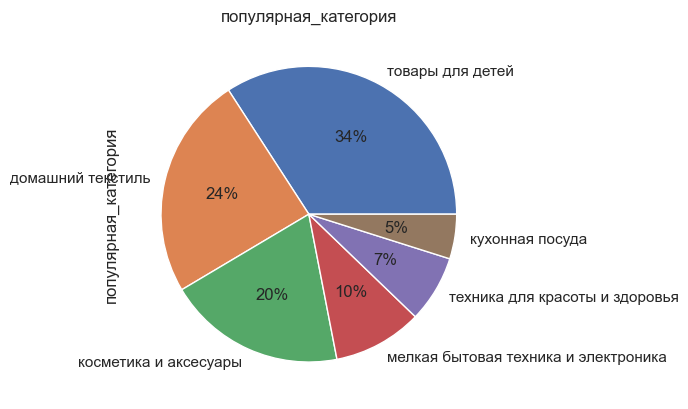

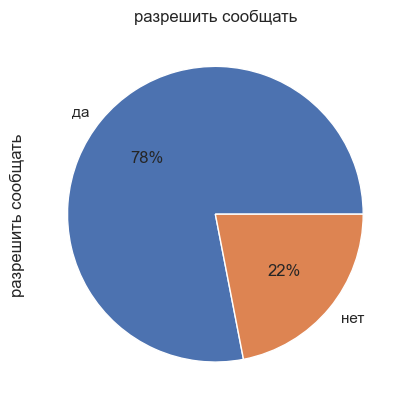

In [85]:
cat_col = ['популярная_категория', 'разрешить сообщать']
for column in cat_col:
    show_pie(prem[column], column)

In [86]:
def show_hist(data, data_label, num_bins, log_scale=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('Плотность', fontsize=15)
    sns.histplot(data, bins=num_bins, ax=axes[0]) 
    sns.scatterplot(data=prem, x=data_label, y='вероятность_снижения', alpha=0.7)     
    plt.show()


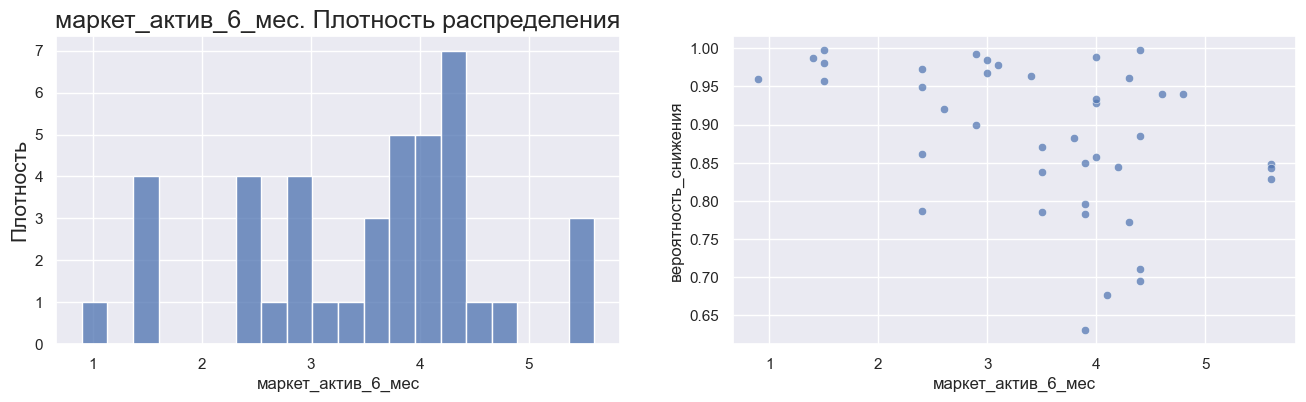

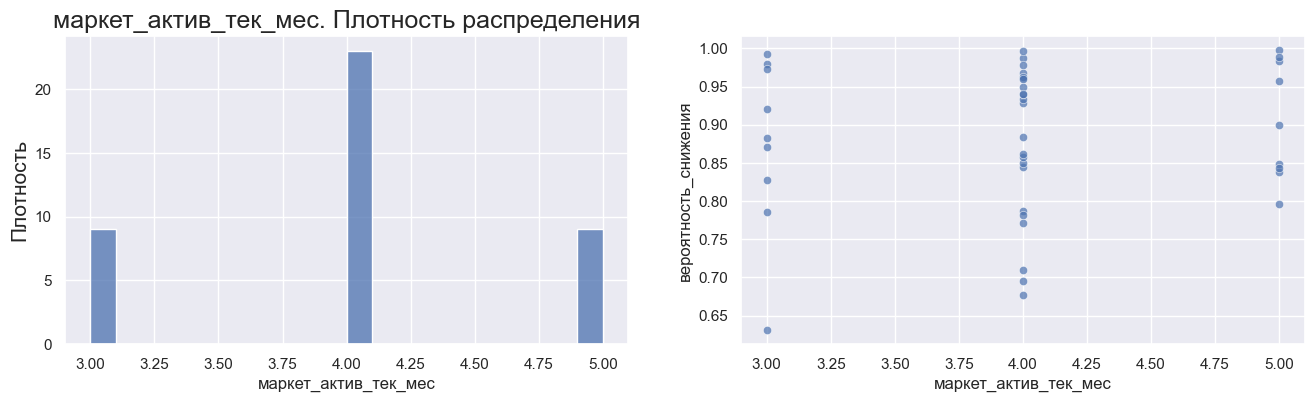

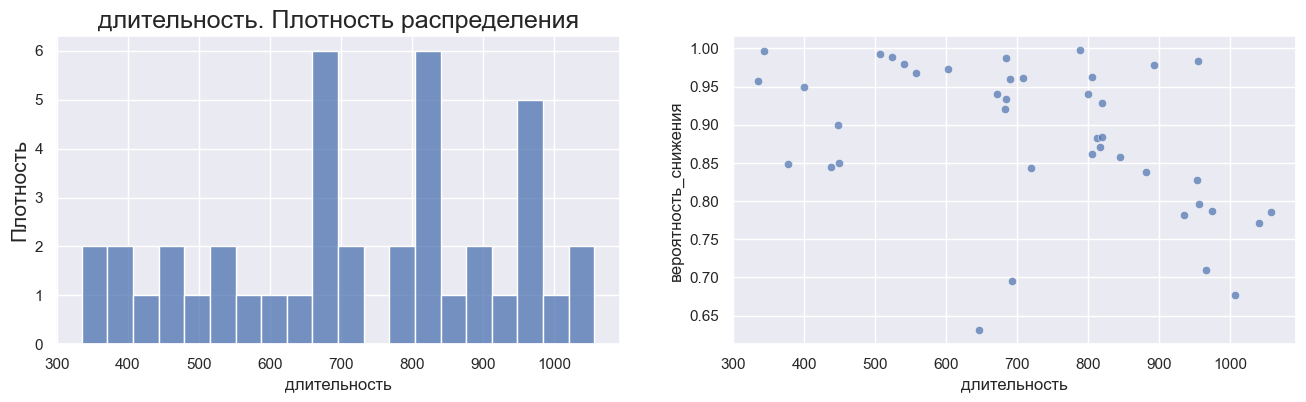

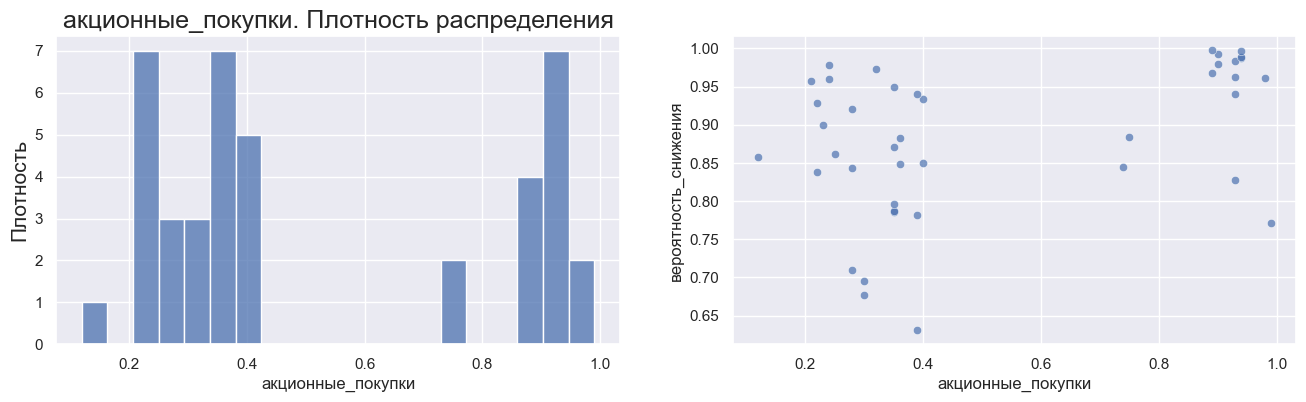

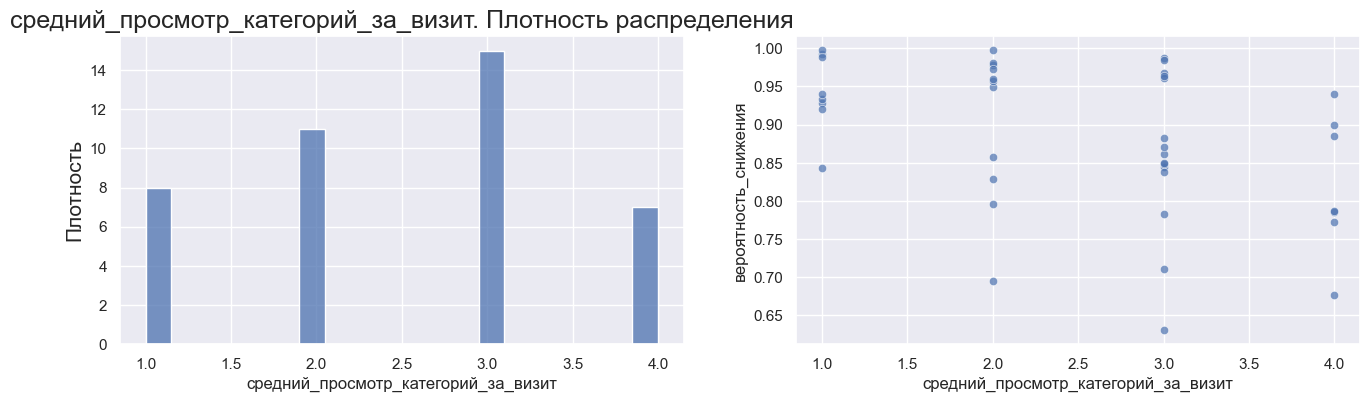

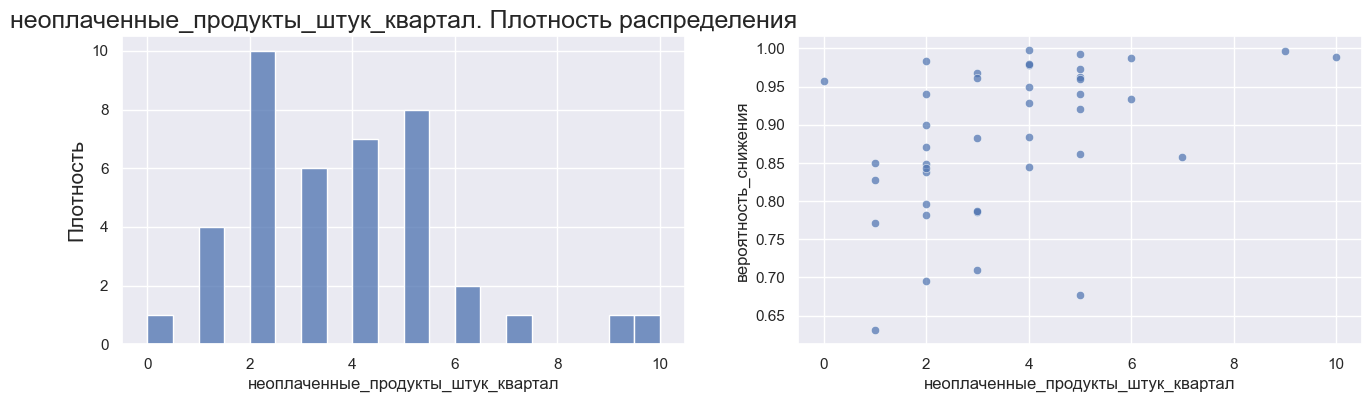

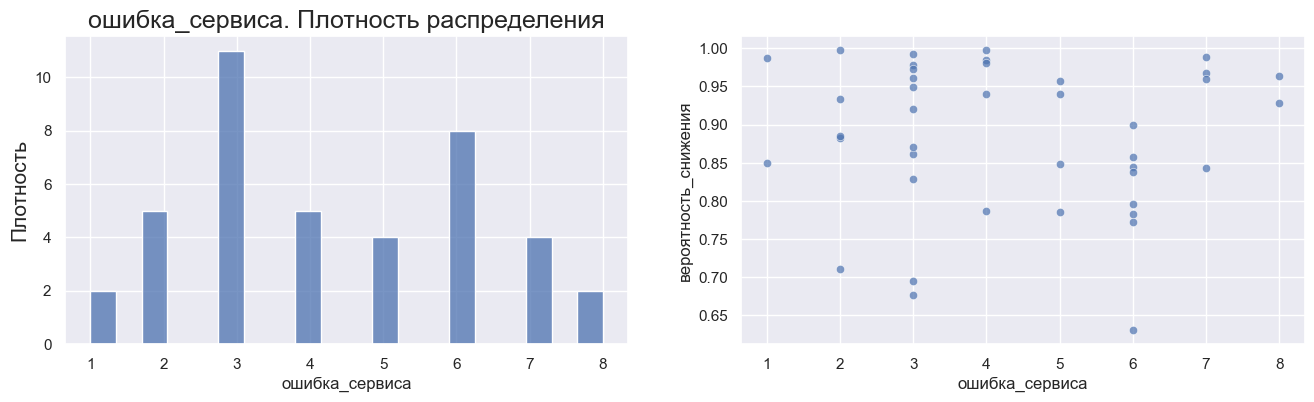

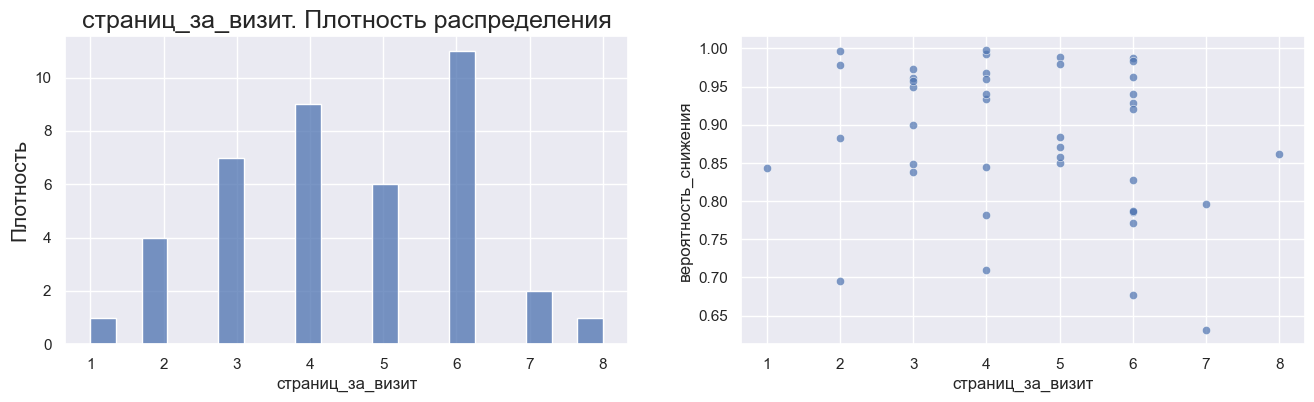

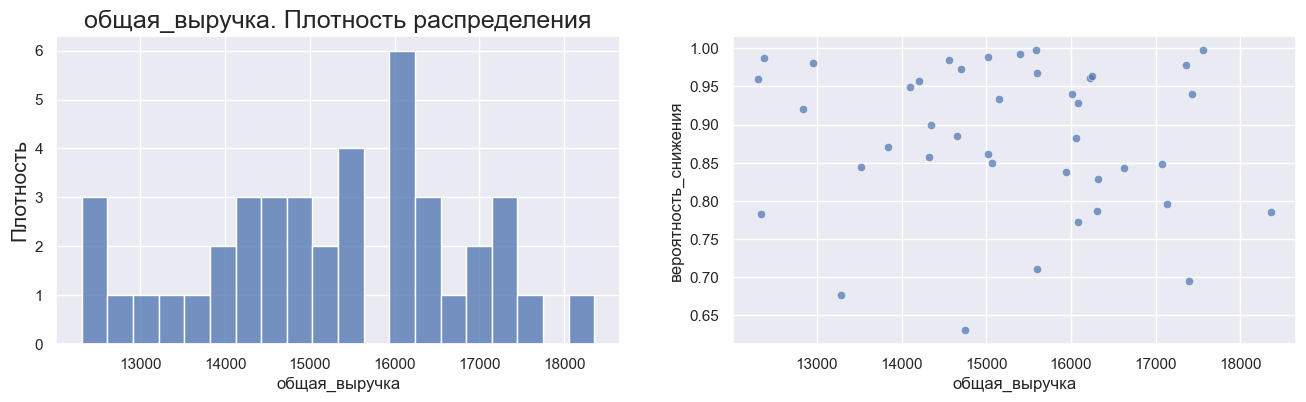

In [87]:

num_col = ['маркет_актив_6_мес',
           'маркет_актив_тек_мес',
           'длительность', 'акционные_покупки', 
           'средний_просмотр_категорий_за_визит',
           'неоплаченные_продукты_штук_квартал',
           'ошибка_сервиса',
           'страниц_за_визит',
           'общая_выручка'
           ]
for column in num_col:
    show_hist(prem[column], column, num_bins=20)

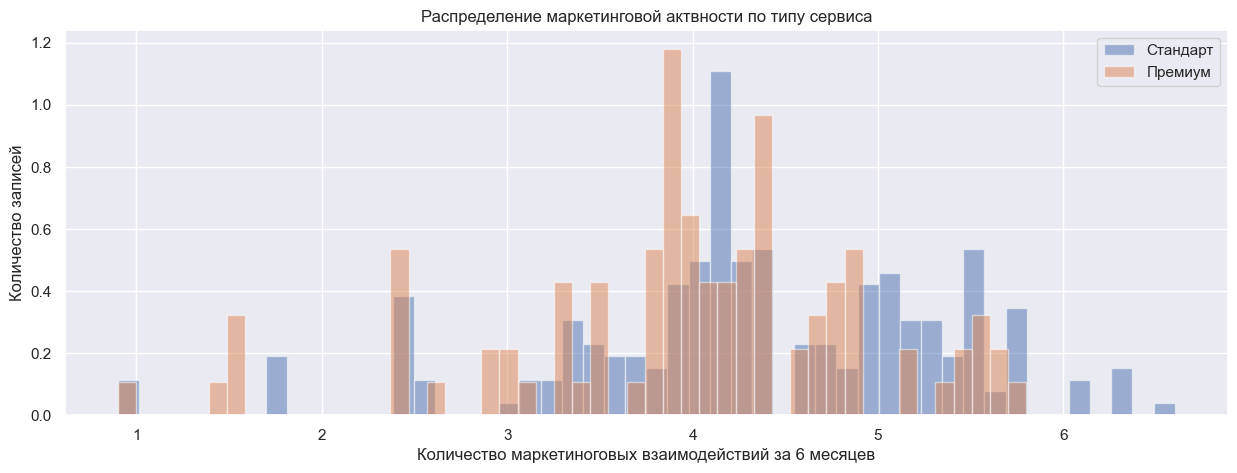

In [89]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(one_test_file_std['маркет_актив_6_мес'],50, alpha=0.5, density=True, label='Стандарт')
ax.hist(one_test_file_prem['маркет_актив_6_мес'],50, alpha=0.5, density=True, label='Премиум')
ax.set_title('Распределение маркетинговой актвности по типу сервиса') 
plt.xlabel('Количество маркетиноговых взаимодействий за 6 месяцев')
plt.ylabel('Количество записей')

plt.legend()
plt.show()

Высокие медианное(0.34) и среднее (0.46) значение вероятности снижения покупательской активности наблюдается у пользователей с типом сервиса "Премиум".    
Также рассматривая картину распределения этих вероятностей, видно что именно в этом сегменте превалирует высокая вероятность.  С учётом того, что интернет-магазин «В один клик» не рассматривает стратегию расширения количества клиентов, 
необходимо поддерживать заинтересованность покупателей с типом сервиса "Премиум", т.к. это лояльная аудитория - медианное значение количества дней с момента регистрации 764 дней против 544 дней у пользователей стандартного типа сервиса. 
Возьмём для рассмотрения сегмент покупателей с типом сервиса "Премум" и вероятностью снижения покупательской активности больше 0.56.  




Для формулирования предложений к поддержанию покупательской активности, рассмотрим следующие факторы:    
1) Продуктовое поведение    
Рассматривая популярные категории, было замечено, что в тройке лидеров находятся "Товары для детей" (34%), "Косметика и аксессуары"(20%) и "Домашний текстиль"(24%).    
Однако, с учётом анализа вклада каждого из критериев методом SHAP, было выявлено, 
что заметным вкладом в поддержании покупательской активности обладает группа товаров "Техника для красоты и здоровья"(0.46) - среди покупателей рассматриваемого сегмента она находится на пятом месте по популярности (7%)  
Таким образом является разумным рассматривать эту категорию для продвижения интересующему нас сегменту покупателей в том числе с целью активнее стимулировать покупки из этой категорию продуктов для повышения продаж.  



2) Коммуникация с клиентом  
78% пользователей дали разрешение на рассылки, однако  у пользователей с типом сервиса "Премиум" и "Стандарт" медианное(4 и 4.3; 0.26 и 0.24 соответственно) значения показателей маркетинговой активности и доли акционных покупок близки, что демонстрирует недостаточное использования потенциала к коммуникации с пользователями "Премиум" сервиса.  
Также на графике распределения количества маркетинговых взаимодействий по вероятности снижения покупательской активности была выявлена сильная корреляция между этими показателями - маркетинговая активность имеет сильный вклад к причислению объектам класса 0(активность осталась прежней).    
Снижение вероятности снижения покупательской активности заметно на уровне в среднем 5 маркетинговых взаимодействий в месяц. 
С учётом первого пункта, можно предложить проводить специальную рассылку по "Премиум" клиентам с акционным предложением товаров, в том числе из сегмента "Техника для красоты и здоровья".



3. Поведение на сайте  
По графику распределения количества просмотренных страницы за визит по вероятности снижения покупательской активности, видно, что при увеличении просмотра страниц вероятность снижается.  
Также как ранее было замечено, признак количества просмотренных страниц имеет сильный вклад в принятие моделью решения о причислении к классу "активность не изменилась".  
Таким образом, стоит обратить внимание на этот фактор и обеспечить комфортное просматривание контента на сайте интернет магазина:    
    - внедрение гибой фильтрации выдачи результатов поиска; усоврешенствование системы     
    - усовершенствование модели формулирования предложения пользователю исходя из истории поиска, покупок, запросов.  

#### Общий вывод

В работе необходимо произвести следующие действия:    
1) Изучение общей информации:  
    - Данные были загружены и представлены в четырёх таблицах: market_file, market_money, market_time и money.
В первой таблице 13 столбцов и 1300 строк, во второй 3 столбца и 3900 строк, в третей - 7 столбцов и 2600 строк, в четвёртой - 2 столбца и 1300 строк
Характеристики в столбцах совпадают с заявленными в техническом задании.
Названия столбцов были приведены к нижнему регистру.    
      
2) Предобработка данных:    
    Данные были предобработаны.    
Дубликаты и пропуски в данных не были обнаружены.    
Вся текстовая информация приведена к нижнему регистру, испралвены опечатки.   
Изменены типы данных в столбцах 'маркет_актив_6_мес', 'акционные_покупки', 'выручка'.  
3) Исследовательский анализ:    
Были удалены 4 строки, в которых было замечено отсутствие покупок в течение одного из трёх месяц наблюдений.  
В ходе анализа были выявлены следующие явления:  
    - В таблице с выручкой от каждого пользователя по месяцам market_money присутсвуют выбросы (около 6% ). Без их учета были построены графики распределения, "ящик с усами" и Q-Q Plot.
    Было замечено, что диапозон выручки за три месяца расширился, медиана выручки увеличилась с 4809 в предпредыдущем месяце до 5179.95 в текущем.  
    - Признак "прибыль" в таблице money имеет распределение нормального вида, имеются выбросы.  
    - Признак "минуты" в таблице market_time не отражает критических изменений в количестве времени, проведённом пользователями на сайте: медианное значение в текущем и предыдущем месяце (13 минут) не изменилось  
    - Среди категориальных признаков отметим следующее:  
        - разрешение на рассылки дали 74%  
        - самая популярная категория товаров - "Товары для детей" (25%), наименее популярная - "Кухонная посуда" (11%)  
        - 71% пользователей имеет стандартный тип севриса  
        - 62% процента покупателей были отмечены неизменившейся покупательской активностью  
    - медиана маркитенговой активности за 6 месяцев (число звонков, рассылок и т.п.) находится на уровне 4  
    - медиана количества дней с момента регистрации на сайте (параметр "длительность") на уровне 600  
    - по распределению доли акционных покупок за 6 месяцев видно разделение на две группы:  0.1-0.45 и 0.85-0.99.   
    - медиана просмотренных категорий за визит равна трём
    - медиана количества просмотренных страниц = 8
    - медиана количества ошибок сервиса, коснувшихся пользователей равна 4   
4) Объединение таблиц:  
    Было произведено слияние таблиц market_file , market_money , market_time в одну. В текущей таблице 1296 записей.
5) Корреляционный анализ данных: 
    Корреляционный анализ был проведён с помощью построения Phik-матрицы корреляции.  
    Мультиколлинеарность (коэффициент корреляции > 0.9) не наблюдается, необходимости в удалении признаков нет.
Наиболее сильная корреляция наблюдается среди признаков у покупательской активности с количестовом проведённого времени на сайте (минуты2 (0.64), минуты3(0.58)),   
выручка за препредыдущий период(выручка1(0.50)), количество просмотренных страниц за визит(0.75), акционные покупки(0.68),   
маркетинговой активностью(0.54), неоплаченными товарами(0.51) в корзине и средний просмотр категорий за визит(0.54).  
    
6) Приминение пайплайнов для поиска лучшей модели прогнозирования:    
    С помощью пайплайна была определена модель по метрике ROC-AUC, подходящая для составления прогноза.   
    Среди четырёх рассмотренных моделей - KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC() - 
    лучше всего себя показала модель логистической регрессии со следующими параметрами: C=2, penalty='l1', random_state=42, solver='liblinear'
ROC-AUC на тренировочной выборке = 0.896 ROC-AUC на тестовой выборке = 0.893  
7) Анализ важности признаков:  
    Для выявления и анализа важности признаков, привносящих наиболее заметный вклад в принятие моделью решения, 
    была проезведена оценка значений Шепли методом SHAP. Также была построена визуализация на графиках shap.plots.beeswarm, shap.plots.waterfall и shap.plots.bar.  
    
    Самые весомые параметры, распознанные на графике shap.plots.bar:  
    - количество просмотренных страниц за визит  
    - количество просмотренных категорий за визит  
    - количество времени, проведённых на сайте во втором и третьем месяце наблюдейний  
    - количество неоплаченных продуктов  
    - акционные покупки  
    - маркетинкговая активность за 6 месяцев
    
    Анализируя картину значений Шепли на графике shap.plots.beeswarm, выявили, что:  
    - признаки количества просмотренных страниц и категорий, 
    проведённых на сайте минут, маркетинговая активность за 6 месяцев с увеличением показателей склоняют модель отнести объекты к классу 0 (активность не изменилась)  
    - признаки количества неоплаченных продуктов и акционных покупок с увеличением показателей сколняют модель отнести объекты к классу 1   
    - из категорий продуктов, сильнее всего влияют мелкая бытовая техника и электроника и техника для красоты и здоровья - склоняют к классу 0.
    
    На по графику shap.plots.waterfall были выявлены признаки, определяющие объект к классу 0:    
    - маркетинговая активность за 6 мес  
    - средний просмотр категорий  
    - категория товаров "техника для красоты и здоровья"  
    - количество просмотренных страниц за визит    
Таким образом можем предположить, что чем активнее кампания взаимодействует с пользователем, и чем дольше пользователь подбирает товары на сайте, тем вероятнее произойдёт покупка.  

8) Сегментация покупателей:  
    Высокие медианное(0.34) и среднее (0.46) значение вероятности снижения покупательской активности 
    наблюдается у пользователей с типом сервиса "Премиум" (по сравнению с медианным(0.18) и средним (0.35) у стандартных пользователей).       
Также рассматривая картину распределения этих вероятностей, видно что именно в этом сегменте превалирует высокая вероятность.   
По ней же определили границу вероятности снижения активности - группа со значениями больше 0.56 выявляет себя на графике распределения вероятностей.  
С учётом того, что интернет-магазин «В один клик» не рассматривает стратегию расширения количества клиентов, 
необходимо поддерживать заинтересованность покупателей с типом сервиса "Премиум", т.к. это лояльная аудитория - 
медианное значение количества дней с момента регистрации 764 дней против 544 дней у пользователей стандартного типа сервиса.  

Таким образом возьмём для рассмотрения сегмент пользователей с типом сервиса "Премиум" и вероятностью снижения активности больше 0.56. 
Для формулирования предложений к поддержанию покупательской активности, рассмотрим следующие факторы:    
- Продуктовое поведение    
Рассматривая популярные категории, было замечено, что в тройке лидеров находятся "Товары для детей" (34%), "Косметика и аксессуары"(20%) и "Домашний текстиль"(24%).    
Однако, с учётом анализа вклада каждого из критериев методом SHAP, было выявлено, 
что заметным вкладом в поддержании покупательской активности обладает группа товаров "Техника для красоты и здоровья"(0.46) - среди покупателей рассматриваемого сегмента она находится на пятом месте по популярности (7%)  
Таким образом является разумным рассматривать эту категорию для продвижения интересующему нас сегменту покупателей в том числе с целью активнее стимулировать покупки из этой категорию продуктов для повышения продаж.    

- Коммуникация с клиентом  
78% пользователей дали разрешение на рассылки, однако  у пользователей с типом сервиса "Премиум" и "Стандарт" медианное(4 и 4.3; 0.26 и 0.24 соответственно) значения показателей маркетинговой активности и доли акционных покупок близки, что демонстрирует недостаточное использования потенциала к коммуникации с пользователями "Премиум" сервиса.  
Также на графике распределения количества маркетинговых взаимодействий по вероятности снижения покупательской активности была выявлена сильная корреляция между этими показателями - маркетинговая активность имеет сильный вклад к причислению объектам класса 0(активность осталась прежней).    
Снижение вероятности снижения покупательской активности заметно на уровне в среднем 5 маркетинговых взаимодействий в месяц.    

- Поведение на сайте  
По графику распределения количества просмотренных страницы за визит по вероятности снижения покупательской активности, видно, что при увеличении просмотра страниц вероятность снижается.  
Также как ранее было замечено, признак количества просмотренных страниц имеет сильный вклад в принятие моделью решения о причислении к классу "активность не изменилась".  
Таким образом, стоит обратить внимание на этот фактор и обеспечить комфортное просматривание контента на сайте интернет магазина:    
    - внедрение гибой фильтрации выдачи результатов поиска;       
    - усовершенствование модели формулирования предложения пользователю исходя из истории поиска, покупок, запросов.  

С учётом наблюдений можно предложить проводить эксклюзивную рассылку по "Премиум" клиентам с акционным предложением товаров, в частности из сегмента "Техника для красоты и здоровья".  
А также необходимо усовершенствование интерфейса интернет-магазина для комфортного просмотра страниц и предложений, внедрение модели таргетингового предложения премиальным покупателям.  



    